In [7]:
%matplotlib notebook

In [8]:
import numpy as np
import pandas as pd
import torch
import gym
import os
import sys
import time

import hvplot.pandas  
from pathlib import Path

import utils
import TD3

# PPO, static env 

In [9]:
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.utils import set_random_seed

In [10]:
env_version = '7'

In [11]:
from gym.envs.registration import registry, make, spec

def register(id, *args, **kwargs):
    if id in registry.env_specs:
        return
    else:
        return gym.envs.registration.register(id, *args, **kwargs)

register(id='BattleshipEnv-v' + env_version,
         entry_point='battleship_gym_v' + env_version +':BattleshipEnvClass',
         max_episode_steps=500,
         reward_threshold=2500000.0)

### Train new model 

In [12]:
timestr = time.strftime("%Y%m%d-%H%M%S")
log_dir = f"tmp/{timestr}/"
os.makedirs(log_dir, exist_ok=True)
env = gym.make("BattleshipEnv-v" + env_version)
env = Monitor(env, log_dir)
model = PPO('MlpPolicy', env, verbose=2)
model.learn(total_timesteps=2e6)

Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 325      |
|    ep_rew_mean     | 130      |
| time/              |          |
|    fps             | 1988     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 348         |
|    ep_rew_mean          | 111         |
| time/                   |             |
|    fps                  | 1236        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010522061 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.6        |
|    explained_varia

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 351         |
|    ep_rew_mean          | 113         |
| time/                   |             |
|    fps                  | 938         |
|    iterations           | 11          |
|    time_elapsed         | 24          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.011756558 |
|    clip_fraction        | 0.086       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.57       |
|    explained_variance   | 0.109       |
|    learning_rate        | 0.0003      |
|    loss                 | 33.4        |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0312     |
|    value_loss           | 54.6        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 350 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 349         |
|    ep_rew_mean          | 111         |
| time/                   |             |
|    fps                  | 932         |
|    iterations           | 21          |
|    time_elapsed         | 46          |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.013975205 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.53       |
|    explained_variance   | 0.248       |
|    learning_rate        | 0.0003      |
|    loss                 | 8.21        |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.0366     |
|    value_loss           | 28.5        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 348   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 361         |
|    ep_rew_mean          | 108         |
| time/                   |             |
|    fps                  | 930         |
|    iterations           | 31          |
|    time_elapsed         | 68          |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.014284631 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.52       |
|    explained_variance   | 0.434       |
|    learning_rate        | 0.0003      |
|    loss                 | 23.4        |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.0418     |
|    value_loss           | 33.5        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 364   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 365         |
|    ep_rew_mean          | 103         |
| time/                   |             |
|    fps                  | 930         |
|    iterations           | 41          |
|    time_elapsed         | 90          |
|    total_timesteps      | 83968       |
| train/                  |             |
|    approx_kl            | 0.014449562 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.49       |
|    explained_variance   | 0.379       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.41        |
|    n_updates            | 400         |
|    policy_gradient_loss | -0.0371     |
|    value_loss           | 37.3        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 367   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 367         |
|    ep_rew_mean          | 95.3        |
| time/                   |             |
|    fps                  | 926         |
|    iterations           | 51          |
|    time_elapsed         | 112         |
|    total_timesteps      | 104448      |
| train/                  |             |
|    approx_kl            | 0.016662052 |
|    clip_fraction        | 0.186       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.42       |
|    explained_variance   | 0.535       |
|    learning_rate        | 0.0003      |
|    loss                 | 10.5        |
|    n_updates            | 500         |
|    policy_gradient_loss | -0.0425     |
|    value_loss           | 19.8        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 369 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 392         |
|    ep_rew_mean          | 85.6        |
| time/                   |             |
|    fps                  | 921         |
|    iterations           | 61          |
|    time_elapsed         | 135         |
|    total_timesteps      | 124928      |
| train/                  |             |
|    approx_kl            | 0.012215983 |
|    clip_fraction        | 0.102       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.43       |
|    explained_variance   | 0.154       |
|    learning_rate        | 0.0003      |
|    loss                 | 45          |
|    n_updates            | 600         |
|    policy_gradient_loss | -0.0341     |
|    value_loss           | 64.3        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 392   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 411         |
|    ep_rew_mean          | 81.5        |
| time/                   |             |
|    fps                  | 920         |
|    iterations           | 71          |
|    time_elapsed         | 157         |
|    total_timesteps      | 145408      |
| train/                  |             |
|    approx_kl            | 0.018418059 |
|    clip_fraction        | 0.197       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.38       |
|    explained_variance   | 0.424       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.89        |
|    n_updates            | 700         |
|    policy_gradient_loss | -0.0393     |
|    value_loss           | 22.5        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 413     

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 422          |
|    ep_rew_mean          | 80.5         |
| time/                   |              |
|    fps                  | 921          |
|    iterations           | 81           |
|    time_elapsed         | 180          |
|    total_timesteps      | 165888       |
| train/                  |              |
|    approx_kl            | 0.0133001795 |
|    clip_fraction        | 0.13         |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.37        |
|    explained_variance   | 0.263        |
|    learning_rate        | 0.0003       |
|    loss                 | 7.24         |
|    n_updates            | 800          |
|    policy_gradient_loss | -0.0354      |
|    value_loss           | 61.2         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 430         |
|    ep_rew_mean          | 73.2        |
| time/                   |             |
|    fps                  | 917         |
|    iterations           | 91          |
|    time_elapsed         | 203         |
|    total_timesteps      | 186368      |
| train/                  |             |
|    approx_kl            | 0.013122128 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.3        |
|    explained_variance   | -0.00759    |
|    learning_rate        | 0.0003      |
|    loss                 | 5.98        |
|    n_updates            | 900         |
|    policy_gradient_loss | -0.0324     |
|    value_loss           | 43          |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 431     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 440         |
|    ep_rew_mean          | 68.1        |
| time/                   |             |
|    fps                  | 912         |
|    iterations           | 101         |
|    time_elapsed         | 226         |
|    total_timesteps      | 206848      |
| train/                  |             |
|    approx_kl            | 0.013089359 |
|    clip_fraction        | 0.119       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.31       |
|    explained_variance   | 0.176       |
|    learning_rate        | 0.0003      |
|    loss                 | 17.8        |
|    n_updates            | 1000        |
|    policy_gradient_loss | -0.0324     |
|    value_loss           | 37.5        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 443   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 448         |
|    ep_rew_mean          | 64.3        |
| time/                   |             |
|    fps                  | 912         |
|    iterations           | 111         |
|    time_elapsed         | 249         |
|    total_timesteps      | 227328      |
| train/                  |             |
|    approx_kl            | 0.015914872 |
|    clip_fraction        | 0.171       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.3        |
|    explained_variance   | 0.269       |
|    learning_rate        | 0.0003      |
|    loss                 | 5.34        |
|    n_updates            | 1100        |
|    policy_gradient_loss | -0.0358     |
|    value_loss           | 29.3        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 451   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 459         |
|    ep_rew_mean          | 56.5        |
| time/                   |             |
|    fps                  | 913         |
|    iterations           | 121         |
|    time_elapsed         | 271         |
|    total_timesteps      | 247808      |
| train/                  |             |
|    approx_kl            | 0.012231794 |
|    clip_fraction        | 0.111       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.27       |
|    explained_variance   | 0.307       |
|    learning_rate        | 0.0003      |
|    loss                 | 26.3        |
|    n_updates            | 1200        |
|    policy_gradient_loss | -0.0301     |
|    value_loss           | 28.8        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 459     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 459         |
|    ep_rew_mean          | 52          |
| time/                   |             |
|    fps                  | 913         |
|    iterations           | 131         |
|    time_elapsed         | 293         |
|    total_timesteps      | 268288      |
| train/                  |             |
|    approx_kl            | 0.019290544 |
|    clip_fraction        | 0.209       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.26       |
|    explained_variance   | -0.0116     |
|    learning_rate        | 0.0003      |
|    loss                 | 3           |
|    n_updates            | 1300        |
|    policy_gradient_loss | -0.0342     |
|    value_loss           | 16.5        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 458   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 448         |
|    ep_rew_mean          | 58.4        |
| time/                   |             |
|    fps                  | 913         |
|    iterations           | 141         |
|    time_elapsed         | 316         |
|    total_timesteps      | 288768      |
| train/                  |             |
|    approx_kl            | 0.024346182 |
|    clip_fraction        | 0.247       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.28       |
|    explained_variance   | 0.403       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.48        |
|    n_updates            | 1400        |
|    policy_gradient_loss | -0.0423     |
|    value_loss           | 12.9        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 451   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 446         |
|    ep_rew_mean          | 63.4        |
| time/                   |             |
|    fps                  | 914         |
|    iterations           | 151         |
|    time_elapsed         | 338         |
|    total_timesteps      | 309248      |
| train/                  |             |
|    approx_kl            | 0.023513433 |
|    clip_fraction        | 0.232       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.26       |
|    explained_variance   | 0.219       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.97        |
|    n_updates            | 1500        |
|    policy_gradient_loss | -0.0387     |
|    value_loss           | 18.8        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 445   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 457         |
|    ep_rew_mean          | 57.5        |
| time/                   |             |
|    fps                  | 915         |
|    iterations           | 161         |
|    time_elapsed         | 360         |
|    total_timesteps      | 329728      |
| train/                  |             |
|    approx_kl            | 0.022986187 |
|    clip_fraction        | 0.287       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.25       |
|    explained_variance   | 0.43        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.614       |
|    n_updates            | 1600        |
|    policy_gradient_loss | -0.0538     |
|    value_loss           | 3.16        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 462   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 471         |
|    ep_rew_mean          | 54.6        |
| time/                   |             |
|    fps                  | 916         |
|    iterations           | 171         |
|    time_elapsed         | 382         |
|    total_timesteps      | 350208      |
| train/                  |             |
|    approx_kl            | 0.028351154 |
|    clip_fraction        | 0.298       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.14       |
|    explained_variance   | 0.762       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.59        |
|    n_updates            | 1700        |
|    policy_gradient_loss | -0.0524     |
|    value_loss           | 3.83        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 471     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 470         |
|    ep_rew_mean          | 55.7        |
| time/                   |             |
|    fps                  | 916         |
|    iterations           | 181         |
|    time_elapsed         | 404         |
|    total_timesteps      | 370688      |
| train/                  |             |
|    approx_kl            | 0.016744409 |
|    clip_fraction        | 0.168       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.22       |
|    explained_variance   | 0.25        |
|    learning_rate        | 0.0003      |
|    loss                 | 9.63        |
|    n_updates            | 1800        |
|    policy_gradient_loss | -0.0324     |
|    value_loss           | 22.1        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 468   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 471         |
|    ep_rew_mean          | 49.5        |
| time/                   |             |
|    fps                  | 917         |
|    iterations           | 191         |
|    time_elapsed         | 426         |
|    total_timesteps      | 391168      |
| train/                  |             |
|    approx_kl            | 0.019176077 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.24       |
|    explained_variance   | 0.135       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.26        |
|    n_updates            | 1900        |
|    policy_gradient_loss | -0.035      |
|    value_loss           | 20.1        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 472   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 462        |
|    ep_rew_mean          | 50.4       |
| time/                   |            |
|    fps                  | 916        |
|    iterations           | 201        |
|    time_elapsed         | 449        |
|    total_timesteps      | 411648     |
| train/                  |            |
|    approx_kl            | 0.01655021 |
|    clip_fraction        | 0.188      |
|    clip_range           | 0.2        |
|    entropy_loss         | -4.17      |
|    explained_variance   | 0.391      |
|    learning_rate        | 0.0003     |
|    loss                 | 2.35       |
|    n_updates            | 2000       |
|    policy_gradient_loss | -0.0272    |
|    value_loss           | 22         |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 462        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 478         |
|    ep_rew_mean          | 43.8        |
| time/                   |             |
|    fps                  | 915         |
|    iterations           | 211         |
|    time_elapsed         | 471         |
|    total_timesteps      | 432128      |
| train/                  |             |
|    approx_kl            | 0.022039572 |
|    clip_fraction        | 0.305       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.14       |
|    explained_variance   | 0.517       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.502       |
|    n_updates            | 2100        |
|    policy_gradient_loss | -0.0465     |
|    value_loss           | 2.44        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 475   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 478         |
|    ep_rew_mean          | 42.4        |
| time/                   |             |
|    fps                  | 915         |
|    iterations           | 221         |
|    time_elapsed         | 494         |
|    total_timesteps      | 452608      |
| train/                  |             |
|    approx_kl            | 0.018004298 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.13       |
|    explained_variance   | 0.13        |
|    learning_rate        | 0.0003      |
|    loss                 | 2.38        |
|    n_updates            | 2200        |
|    policy_gradient_loss | -0.0322     |
|    value_loss           | 18.8        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 478   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 481         |
|    ep_rew_mean          | 38.2        |
| time/                   |             |
|    fps                  | 915         |
|    iterations           | 231         |
|    time_elapsed         | 516         |
|    total_timesteps      | 473088      |
| train/                  |             |
|    approx_kl            | 0.032294553 |
|    clip_fraction        | 0.348       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.08       |
|    explained_variance   | 0.824       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0649      |
|    n_updates            | 2300        |
|    policy_gradient_loss | -0.0614     |
|    value_loss           | 0.661       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 477   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 474         |
|    ep_rew_mean          | 42.2        |
| time/                   |             |
|    fps                  | 916         |
|    iterations           | 241         |
|    time_elapsed         | 538         |
|    total_timesteps      | 493568      |
| train/                  |             |
|    approx_kl            | 0.021894764 |
|    clip_fraction        | 0.262       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.02       |
|    explained_variance   | 0.696       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.54        |
|    n_updates            | 2400        |
|    policy_gradient_loss | -0.046      |
|    value_loss           | 2.51        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 474   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 473         |
|    ep_rew_mean          | 40.7        |
| time/                   |             |
|    fps                  | 916         |
|    iterations           | 251         |
|    time_elapsed         | 560         |
|    total_timesteps      | 514048      |
| train/                  |             |
|    approx_kl            | 0.026330657 |
|    clip_fraction        | 0.277       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.94       |
|    explained_variance   | 0.828       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.166       |
|    n_updates            | 2500        |
|    policy_gradient_loss | -0.0526     |
|    value_loss           | 0.933       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 473   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 476         |
|    ep_rew_mean          | 39.7        |
| time/                   |             |
|    fps                  | 916         |
|    iterations           | 261         |
|    time_elapsed         | 583         |
|    total_timesteps      | 534528      |
| train/                  |             |
|    approx_kl            | 0.011216842 |
|    clip_fraction        | 0.0866      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.12       |
|    explained_variance   | -0.175      |
|    learning_rate        | 0.0003      |
|    loss                 | 13.2        |
|    n_updates            | 2600        |
|    policy_gradient_loss | -0.0272     |
|    value_loss           | 49          |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 477   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 474         |
|    ep_rew_mean          | 42          |
| time/                   |             |
|    fps                  | 917         |
|    iterations           | 271         |
|    time_elapsed         | 604         |
|    total_timesteps      | 555008      |
| train/                  |             |
|    approx_kl            | 0.029654004 |
|    clip_fraction        | 0.333       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.99       |
|    explained_variance   | 0.774       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.185       |
|    n_updates            | 2700        |
|    policy_gradient_loss | -0.0556     |
|    value_loss           | 1.47        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 472   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 470         |
|    ep_rew_mean          | 46          |
| time/                   |             |
|    fps                  | 917         |
|    iterations           | 281         |
|    time_elapsed         | 627         |
|    total_timesteps      | 575488      |
| train/                  |             |
|    approx_kl            | 0.008769423 |
|    clip_fraction        | 0.0865      |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.97       |
|    explained_variance   | 0.04        |
|    learning_rate        | 0.0003      |
|    loss                 | 10.4        |
|    n_updates            | 2800        |
|    policy_gradient_loss | -0.0234     |
|    value_loss           | 65.6        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 474   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 476         |
|    ep_rew_mean          | 44.7        |
| time/                   |             |
|    fps                  | 917         |
|    iterations           | 291         |
|    time_elapsed         | 649         |
|    total_timesteps      | 595968      |
| train/                  |             |
|    approx_kl            | 0.018440213 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.95       |
|    explained_variance   | 0.312       |
|    learning_rate        | 0.0003      |
|    loss                 | 6.85        |
|    n_updates            | 2900        |
|    policy_gradient_loss | -0.0342     |
|    value_loss           | 19          |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 475     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 468         |
|    ep_rew_mean          | 51.2        |
| time/                   |             |
|    fps                  | 918         |
|    iterations           | 301         |
|    time_elapsed         | 671         |
|    total_timesteps      | 616448      |
| train/                  |             |
|    approx_kl            | 0.011005289 |
|    clip_fraction        | 0.0942      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.08       |
|    explained_variance   | 0.0455      |
|    learning_rate        | 0.0003      |
|    loss                 | 27.5        |
|    n_updates            | 3000        |
|    policy_gradient_loss | -0.0286     |
|    value_loss           | 77.8        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 467     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 474         |
|    ep_rew_mean          | 46.2        |
| time/                   |             |
|    fps                  | 919         |
|    iterations           | 311         |
|    time_elapsed         | 693         |
|    total_timesteps      | 636928      |
| train/                  |             |
|    approx_kl            | 0.016701061 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.1        |
|    explained_variance   | 0.232       |
|    learning_rate        | 0.0003      |
|    loss                 | 12          |
|    n_updates            | 3100        |
|    policy_gradient_loss | -0.0296     |
|    value_loss           | 23.6        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 476   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 479         |
|    ep_rew_mean          | 45.8        |
| time/                   |             |
|    fps                  | 919         |
|    iterations           | 321         |
|    time_elapsed         | 714         |
|    total_timesteps      | 657408      |
| train/                  |             |
|    approx_kl            | 0.014356662 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.01       |
|    explained_variance   | 0.403       |
|    learning_rate        | 0.0003      |
|    loss                 | 12.9        |
|    n_updates            | 3200        |
|    policy_gradient_loss | -0.0237     |
|    value_loss           | 22.4        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 480     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 488        |
|    ep_rew_mean          | 38.1       |
| time/                   |            |
|    fps                  | 920        |
|    iterations           | 331        |
|    time_elapsed         | 736        |
|    total_timesteps      | 677888     |
| train/                  |            |
|    approx_kl            | 0.02583126 |
|    clip_fraction        | 0.285      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.96      |
|    explained_variance   | 0.585      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.175      |
|    n_updates            | 3300       |
|    policy_gradient_loss | -0.0461    |
|    value_loss           | 1.53       |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 488         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 482         |
|    ep_rew_mean          | 43.9        |
| time/                   |             |
|    fps                  | 920         |
|    iterations           | 341         |
|    time_elapsed         | 758         |
|    total_timesteps      | 698368      |
| train/                  |             |
|    approx_kl            | 0.017687121 |
|    clip_fraction        | 0.197       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4          |
|    explained_variance   | 0.292       |
|    learning_rate        | 0.0003      |
|    loss                 | 46          |
|    n_updates            | 3400        |
|    policy_gradient_loss | -0.0306     |
|    value_loss           | 27.4        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 483   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 479         |
|    ep_rew_mean          | 42.4        |
| time/                   |             |
|    fps                  | 920         |
|    iterations           | 351         |
|    time_elapsed         | 780         |
|    total_timesteps      | 718848      |
| train/                  |             |
|    approx_kl            | 0.019606901 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.9        |
|    explained_variance   | 0.118       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.73        |
|    n_updates            | 3500        |
|    policy_gradient_loss | -0.03       |
|    value_loss           | 24.4        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 480   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 481         |
|    ep_rew_mean          | 39.5        |
| time/                   |             |
|    fps                  | 920         |
|    iterations           | 361         |
|    time_elapsed         | 803         |
|    total_timesteps      | 739328      |
| train/                  |             |
|    approx_kl            | 0.033656724 |
|    clip_fraction        | 0.33        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.94       |
|    explained_variance   | 0.822       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.101       |
|    n_updates            | 3600        |
|    policy_gradient_loss | -0.0539     |
|    value_loss           | 0.975       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 481   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 489         |
|    ep_rew_mean          | 35.9        |
| time/                   |             |
|    fps                  | 920         |
|    iterations           | 371         |
|    time_elapsed         | 825         |
|    total_timesteps      | 759808      |
| train/                  |             |
|    approx_kl            | 0.015637865 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.02       |
|    explained_variance   | 0.0334      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.554       |
|    n_updates            | 3700        |
|    policy_gradient_loss | -0.0227     |
|    value_loss           | 29          |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 489     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 482         |
|    ep_rew_mean          | 38.4        |
| time/                   |             |
|    fps                  | 920         |
|    iterations           | 381         |
|    time_elapsed         | 847         |
|    total_timesteps      | 780288      |
| train/                  |             |
|    approx_kl            | 0.010510165 |
|    clip_fraction        | 0.0713      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4          |
|    explained_variance   | 0.0407      |
|    learning_rate        | 0.0003      |
|    loss                 | 3.76        |
|    n_updates            | 3800        |
|    policy_gradient_loss | -0.0193     |
|    value_loss           | 47.8        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 482 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 480         |
|    ep_rew_mean          | 38.8        |
| time/                   |             |
|    fps                  | 921         |
|    iterations           | 391         |
|    time_elapsed         | 869         |
|    total_timesteps      | 800768      |
| train/                  |             |
|    approx_kl            | 0.017039817 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4          |
|    explained_variance   | 0.0929      |
|    learning_rate        | 0.0003      |
|    loss                 | 23          |
|    n_updates            | 3900        |
|    policy_gradient_loss | -0.0291     |
|    value_loss           | 22.7        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 480   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 485        |
|    ep_rew_mean          | 37.1       |
| time/                   |            |
|    fps                  | 921        |
|    iterations           | 401        |
|    time_elapsed         | 891        |
|    total_timesteps      | 821248     |
| train/                  |            |
|    approx_kl            | 0.02394405 |
|    clip_fraction        | 0.28       |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.99      |
|    explained_variance   | 0.721      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.213      |
|    n_updates            | 4000       |
|    policy_gradient_loss | -0.0477    |
|    value_loss           | 0.753      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 487         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 491         |
|    ep_rew_mean          | 32.6        |
| time/                   |             |
|    fps                  | 921         |
|    iterations           | 411         |
|    time_elapsed         | 913         |
|    total_timesteps      | 841728      |
| train/                  |             |
|    approx_kl            | 0.028878743 |
|    clip_fraction        | 0.311       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.9        |
|    explained_variance   | 0.846       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.631       |
|    n_updates            | 4100        |
|    policy_gradient_loss | -0.0446     |
|    value_loss           | 1.06        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 491   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 490         |
|    ep_rew_mean          | 33.2        |
| time/                   |             |
|    fps                  | 921         |
|    iterations           | 421         |
|    time_elapsed         | 935         |
|    total_timesteps      | 862208      |
| train/                  |             |
|    approx_kl            | 0.024239939 |
|    clip_fraction        | 0.285       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.86       |
|    explained_variance   | 0.591       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.195       |
|    n_updates            | 4200        |
|    policy_gradient_loss | -0.0527     |
|    value_loss           | 0.831       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 490   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 489         |
|    ep_rew_mean          | 33.3        |
| time/                   |             |
|    fps                  | 921         |
|    iterations           | 431         |
|    time_elapsed         | 957         |
|    total_timesteps      | 882688      |
| train/                  |             |
|    approx_kl            | 0.015849322 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.86       |
|    explained_variance   | 0.226       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.63        |
|    n_updates            | 4300        |
|    policy_gradient_loss | -0.0267     |
|    value_loss           | 26.7        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 489   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 490         |
|    ep_rew_mean          | 33.4        |
| time/                   |             |
|    fps                  | 921         |
|    iterations           | 441         |
|    time_elapsed         | 979         |
|    total_timesteps      | 903168      |
| train/                  |             |
|    approx_kl            | 0.026742255 |
|    clip_fraction        | 0.297       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.83       |
|    explained_variance   | 0.851       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0338      |
|    n_updates            | 4400        |
|    policy_gradient_loss | -0.0485     |
|    value_loss           | 0.516       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 491   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 491         |
|    ep_rew_mean          | 35.6        |
| time/                   |             |
|    fps                  | 921         |
|    iterations           | 451         |
|    time_elapsed         | 1002        |
|    total_timesteps      | 923648      |
| train/                  |             |
|    approx_kl            | 0.017264187 |
|    clip_fraction        | 0.186       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.8        |
|    explained_variance   | 0.0382      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.692       |
|    n_updates            | 4500        |
|    policy_gradient_loss | -0.0273     |
|    value_loss           | 26.7        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 489   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 487        |
|    ep_rew_mean          | 39.6       |
| time/                   |            |
|    fps                  | 922        |
|    iterations           | 461        |
|    time_elapsed         | 1023       |
|    total_timesteps      | 944128     |
| train/                  |            |
|    approx_kl            | 0.03435421 |
|    clip_fraction        | 0.354      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.87      |
|    explained_variance   | 0.838      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0111     |
|    n_updates            | 4600       |
|    policy_gradient_loss | -0.0562    |
|    value_loss           | 0.755      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 487         |
|    ep_rew_m

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 487        |
|    ep_rew_mean          | 39.6       |
| time/                   |            |
|    fps                  | 922        |
|    iterations           | 471        |
|    time_elapsed         | 1046       |
|    total_timesteps      | 964608     |
| train/                  |            |
|    approx_kl            | 0.03219574 |
|    clip_fraction        | 0.352      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.82      |
|    explained_variance   | 0.862      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.344      |
|    n_updates            | 4700       |
|    policy_gradient_loss | -0.0578    |
|    value_loss           | 1.43       |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 487         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 485         |
|    ep_rew_mean          | 38.5        |
| time/                   |             |
|    fps                  | 921         |
|    iterations           | 481         |
|    time_elapsed         | 1068        |
|    total_timesteps      | 985088      |
| train/                  |             |
|    approx_kl            | 0.011138739 |
|    clip_fraction        | 0.108       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.73       |
|    explained_variance   | 0.327       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.58        |
|    n_updates            | 4800        |
|    policy_gradient_loss | -0.0201     |
|    value_loss           | 30.8        |
-----------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 485       

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 485         |
|    ep_rew_mean          | 34.4        |
| time/                   |             |
|    fps                  | 923         |
|    iterations           | 491         |
|    time_elapsed         | 1088        |
|    total_timesteps      | 1005568     |
| train/                  |             |
|    approx_kl            | 0.020715836 |
|    clip_fraction        | 0.231       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.76       |
|    explained_variance   | 0.221       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.255       |
|    n_updates            | 4900        |
|    policy_gradient_loss | -0.0293     |
|    value_loss           | 19.5        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 485   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 486          |
|    ep_rew_mean          | 34           |
| time/                   |              |
|    fps                  | 927          |
|    iterations           | 501          |
|    time_elapsed         | 1106         |
|    total_timesteps      | 1026048      |
| train/                  |              |
|    approx_kl            | 0.0075576226 |
|    clip_fraction        | 0.0481       |
|    clip_range           | 0.2          |
|    entropy_loss         | -3.79        |
|    explained_variance   | -0.0164      |
|    learning_rate        | 0.0003       |
|    loss                 | 1.55         |
|    n_updates            | 5000         |
|    policy_gradient_loss | -0.0165      |
|    value_loss           | 48.1         |
------------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mea

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 492         |
|    ep_rew_mean          | 30          |
| time/                   |             |
|    fps                  | 930         |
|    iterations           | 511         |
|    time_elapsed         | 1124        |
|    total_timesteps      | 1046528     |
| train/                  |             |
|    approx_kl            | 0.014121622 |
|    clip_fraction        | 0.172       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.73       |
|    explained_variance   | 0.106       |
|    learning_rate        | 0.0003      |
|    loss                 | 6.28        |
|    n_updates            | 5100        |
|    policy_gradient_loss | -0.0201     |
|    value_loss           | 22.5        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 492   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 492         |
|    ep_rew_mean          | 29.8        |
| time/                   |             |
|    fps                  | 933         |
|    iterations           | 521         |
|    time_elapsed         | 1142        |
|    total_timesteps      | 1067008     |
| train/                  |             |
|    approx_kl            | 0.024189409 |
|    clip_fraction        | 0.314       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.71       |
|    explained_variance   | 0.504       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0603      |
|    n_updates            | 5200        |
|    policy_gradient_loss | -0.0469     |
|    value_loss           | 0.667       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 492   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 493         |
|    ep_rew_mean          | 29.6        |
| time/                   |             |
|    fps                  | 936         |
|    iterations           | 531         |
|    time_elapsed         | 1160        |
|    total_timesteps      | 1087488     |
| train/                  |             |
|    approx_kl            | 0.027089125 |
|    clip_fraction        | 0.296       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.76       |
|    explained_variance   | 0.776       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.122       |
|    n_updates            | 5300        |
|    policy_gradient_loss | -0.0488     |
|    value_loss           | 0.607       |
-----------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 493       

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 495         |
|    ep_rew_mean          | 28.4        |
| time/                   |             |
|    fps                  | 940         |
|    iterations           | 541         |
|    time_elapsed         | 1178        |
|    total_timesteps      | 1107968     |
| train/                  |             |
|    approx_kl            | 0.023053857 |
|    clip_fraction        | 0.284       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.69       |
|    explained_variance   | 0.628       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0343      |
|    n_updates            | 5400        |
|    policy_gradient_loss | -0.0478     |
|    value_loss           | 0.84        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 494     

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 494       |
|    ep_rew_mean          | 31.6      |
| time/                   |           |
|    fps                  | 942       |
|    iterations           | 551       |
|    time_elapsed         | 1197      |
|    total_timesteps      | 1128448   |
| train/                  |           |
|    approx_kl            | 0.0236475 |
|    clip_fraction        | 0.282     |
|    clip_range           | 0.2       |
|    entropy_loss         | -3.77     |
|    explained_variance   | 0.489     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.212     |
|    n_updates            | 5500      |
|    policy_gradient_loss | -0.047    |
|    value_loss           | 1.09      |
---------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 493         |
|    ep_rew_mean          | 32.8  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496         |
|    ep_rew_mean          | 31.2        |
| time/                   |             |
|    fps                  | 945         |
|    iterations           | 561         |
|    time_elapsed         | 1215        |
|    total_timesteps      | 1148928     |
| train/                  |             |
|    approx_kl            | 0.028438846 |
|    clip_fraction        | 0.32        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.74       |
|    explained_variance   | 0.291       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0706      |
|    n_updates            | 5600        |
|    policy_gradient_loss | -0.0503     |
|    value_loss           | 0.69        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494         |
|    ep_rew_mean          | 32.5        |
| time/                   |             |
|    fps                  | 947         |
|    iterations           | 571         |
|    time_elapsed         | 1234        |
|    total_timesteps      | 1169408     |
| train/                  |             |
|    approx_kl            | 0.028845597 |
|    clip_fraction        | 0.296       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.84       |
|    explained_variance   | 0.67        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0968      |
|    n_updates            | 5700        |
|    policy_gradient_loss | -0.0511     |
|    value_loss           | 0.889       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496         |
|    ep_rew_mean          | 27.8        |
| time/                   |             |
|    fps                  | 949         |
|    iterations           | 581         |
|    time_elapsed         | 1252        |
|    total_timesteps      | 1189888     |
| train/                  |             |
|    approx_kl            | 0.028038215 |
|    clip_fraction        | 0.294       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.81       |
|    explained_variance   | 0.827       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0552      |
|    n_updates            | 5800        |
|    policy_gradient_loss | -0.0527     |
|    value_loss           | 0.403       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496         |
|    ep_rew_mean          | 27.6        |
| time/                   |             |
|    fps                  | 952         |
|    iterations           | 591         |
|    time_elapsed         | 1271        |
|    total_timesteps      | 1210368     |
| train/                  |             |
|    approx_kl            | 0.029315524 |
|    clip_fraction        | 0.345       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.73       |
|    explained_variance   | 0.754       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0586      |
|    n_updates            | 5900        |
|    policy_gradient_loss | -0.0536     |
|    value_loss           | 0.412       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 496     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 26.6        |
| time/                   |             |
|    fps                  | 954         |
|    iterations           | 601         |
|    time_elapsed         | 1289        |
|    total_timesteps      | 1230848     |
| train/                  |             |
|    approx_kl            | 0.027996805 |
|    clip_fraction        | 0.3         |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.8        |
|    explained_variance   | 0.583       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0232      |
|    n_updates            | 6000        |
|    policy_gradient_loss | -0.0485     |
|    value_loss           | 0.693       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 498     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494         |
|    ep_rew_mean          | 30.8        |
| time/                   |             |
|    fps                  | 957         |
|    iterations           | 611         |
|    time_elapsed         | 1307        |
|    total_timesteps      | 1251328     |
| train/                  |             |
|    approx_kl            | 0.010129735 |
|    clip_fraction        | 0.0749      |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.67       |
|    explained_variance   | 0.117       |
|    learning_rate        | 0.0003      |
|    loss                 | 19.4        |
|    n_updates            | 6100        |
|    policy_gradient_loss | -0.0152     |
|    value_loss           | 37.8        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494         |
|    ep_rew_mean          | 31          |
| time/                   |             |
|    fps                  | 958         |
|    iterations           | 621         |
|    time_elapsed         | 1326        |
|    total_timesteps      | 1271808     |
| train/                  |             |
|    approx_kl            | 0.018425055 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.69       |
|    explained_variance   | 0.0249      |
|    learning_rate        | 0.0003      |
|    loss                 | 35.7        |
|    n_updates            | 6200        |
|    policy_gradient_loss | -0.0227     |
|    value_loss           | 23.7        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 495         |
|    ep_rew_mean          | 31          |
| time/                   |             |
|    fps                  | 960         |
|    iterations           | 631         |
|    time_elapsed         | 1346        |
|    total_timesteps      | 1292288     |
| train/                  |             |
|    approx_kl            | 0.028116683 |
|    clip_fraction        | 0.325       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.63       |
|    explained_variance   | 0.869       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0153      |
|    n_updates            | 6300        |
|    policy_gradient_loss | -0.054      |
|    value_loss           | 0.401       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 495   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497         |
|    ep_rew_mean          | 26.5        |
| time/                   |             |
|    fps                  | 960         |
|    iterations           | 641         |
|    time_elapsed         | 1366        |
|    total_timesteps      | 1312768     |
| train/                  |             |
|    approx_kl            | 0.016316952 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.58       |
|    explained_variance   | -0.113      |
|    learning_rate        | 0.0003      |
|    loss                 | 3.44        |
|    n_updates            | 6400        |
|    policy_gradient_loss | -0.0178     |
|    value_loss           | 23.4        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 493         |
|    ep_rew_mean          | 27.6        |
| time/                   |             |
|    fps                  | 961         |
|    iterations           | 651         |
|    time_elapsed         | 1386        |
|    total_timesteps      | 1333248     |
| train/                  |             |
|    approx_kl            | 0.013166364 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.64       |
|    explained_variance   | 0.128       |
|    learning_rate        | 0.0003      |
|    loss                 | 28.2        |
|    n_updates            | 6500        |
|    policy_gradient_loss | -0.02       |
|    value_loss           | 22.2        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 492   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 492         |
|    ep_rew_mean          | 29.3        |
| time/                   |             |
|    fps                  | 963         |
|    iterations           | 661         |
|    time_elapsed         | 1404        |
|    total_timesteps      | 1353728     |
| train/                  |             |
|    approx_kl            | 0.032693464 |
|    clip_fraction        | 0.322       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.55       |
|    explained_variance   | 0.831       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0381      |
|    n_updates            | 6600        |
|    policy_gradient_loss | -0.0531     |
|    value_loss           | 0.426       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 492   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 495         |
|    ep_rew_mean          | 27.4        |
| time/                   |             |
|    fps                  | 965         |
|    iterations           | 671         |
|    time_elapsed         | 1423        |
|    total_timesteps      | 1374208     |
| train/                  |             |
|    approx_kl            | 0.025420986 |
|    clip_fraction        | 0.293       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.56       |
|    explained_variance   | 0.713       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0531      |
|    n_updates            | 6700        |
|    policy_gradient_loss | -0.0471     |
|    value_loss           | 0.368       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 495     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 497        |
|    ep_rew_mean          | 25.5       |
| time/                   |            |
|    fps                  | 966        |
|    iterations           | 681        |
|    time_elapsed         | 1443       |
|    total_timesteps      | 1394688    |
| train/                  |            |
|    approx_kl            | 0.02748283 |
|    clip_fraction        | 0.292      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.6       |
|    explained_variance   | 0.788      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.039      |
|    n_updates            | 6800       |
|    policy_gradient_loss | -0.0496    |
|    value_loss           | 0.527      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 498         |
|    ep_rew_mean          | 24.5        |
| time/                   |             |
|    fps                  | 966         |
|    iterations           | 691         |
|    time_elapsed         | 1463        |
|    total_timesteps      | 1415168     |
| train/                  |             |
|    approx_kl            | 0.030331189 |
|    clip_fraction        | 0.326       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.5        |
|    explained_variance   | 0.764       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00558    |
|    n_updates            | 6900        |
|    policy_gradient_loss | -0.0561     |
|    value_loss           | 0.315       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 498   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496         |
|    ep_rew_mean          | 24          |
| time/                   |             |
|    fps                  | 968         |
|    iterations           | 701         |
|    time_elapsed         | 1482        |
|    total_timesteps      | 1435648     |
| train/                  |             |
|    approx_kl            | 0.016233504 |
|    clip_fraction        | 0.16        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.33       |
|    explained_variance   | 0.123       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.66        |
|    n_updates            | 7000        |
|    policy_gradient_loss | -0.024      |
|    value_loss           | 25.3        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 496     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 497        |
|    ep_rew_mean          | 23         |
| time/                   |            |
|    fps                  | 969        |
|    iterations           | 711        |
|    time_elapsed         | 1501       |
|    total_timesteps      | 1456128    |
| train/                  |            |
|    approx_kl            | 0.02545056 |
|    clip_fraction        | 0.291      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.48      |
|    explained_variance   | 0.792      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0334     |
|    n_updates            | 7100       |
|    policy_gradient_loss | -0.0502    |
|    value_loss           | 0.496      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 491         |
|    ep_rew_mean          | 28.4        |
| time/                   |             |
|    fps                  | 970         |
|    iterations           | 721         |
|    time_elapsed         | 1521        |
|    total_timesteps      | 1476608     |
| train/                  |             |
|    approx_kl            | 0.025438525 |
|    clip_fraction        | 0.264       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.51       |
|    explained_variance   | 0.528       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.277       |
|    n_updates            | 7200        |
|    policy_gradient_loss | -0.0366     |
|    value_loss           | 1.51        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 491   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 491         |
|    ep_rew_mean          | 27.9        |
| time/                   |             |
|    fps                  | 972         |
|    iterations           | 731         |
|    time_elapsed         | 1540        |
|    total_timesteps      | 1497088     |
| train/                  |             |
|    approx_kl            | 0.023879921 |
|    clip_fraction        | 0.272       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.51       |
|    explained_variance   | 0.643       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.187       |
|    n_updates            | 7300        |
|    policy_gradient_loss | -0.0458     |
|    value_loss           | 0.809       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 491     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 492         |
|    ep_rew_mean          | 28.4        |
| time/                   |             |
|    fps                  | 974         |
|    iterations           | 741         |
|    time_elapsed         | 1557        |
|    total_timesteps      | 1517568     |
| train/                  |             |
|    approx_kl            | 0.014959456 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.51       |
|    explained_variance   | -0.0127     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.276       |
|    n_updates            | 7400        |
|    policy_gradient_loss | -0.014      |
|    value_loss           | 21          |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 496        |
|    ep_rew_mean          | 26.4       |
| time/                   |            |
|    fps                  | 975        |
|    iterations           | 751        |
|    time_elapsed         | 1576       |
|    total_timesteps      | 1538048    |
| train/                  |            |
|    approx_kl            | 0.02546031 |
|    clip_fraction        | 0.288      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.25      |
|    explained_variance   | 0.757      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.05       |
|    n_updates            | 7500       |
|    policy_gradient_loss | -0.0451    |
|    value_loss           | 0.392      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 493         |
|    ep_rew_mean          | 27.2        |
| time/                   |             |
|    fps                  | 977         |
|    iterations           | 761         |
|    time_elapsed         | 1594        |
|    total_timesteps      | 1558528     |
| train/                  |             |
|    approx_kl            | 0.029143315 |
|    clip_fraction        | 0.369       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.56       |
|    explained_variance   | 0.611       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0592      |
|    n_updates            | 7600        |
|    policy_gradient_loss | -0.0525     |
|    value_loss           | 0.407       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 495   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494         |
|    ep_rew_mean          | 27.7        |
| time/                   |             |
|    fps                  | 978         |
|    iterations           | 771         |
|    time_elapsed         | 1612        |
|    total_timesteps      | 1579008     |
| train/                  |             |
|    approx_kl            | 0.025785886 |
|    clip_fraction        | 0.257       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.58       |
|    explained_variance   | 0.614       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0194      |
|    n_updates            | 7700        |
|    policy_gradient_loss | -0.0449     |
|    value_loss           | 0.825       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496         |
|    ep_rew_mean          | 27.4        |
| time/                   |             |
|    fps                  | 980         |
|    iterations           | 781         |
|    time_elapsed         | 1631        |
|    total_timesteps      | 1599488     |
| train/                  |             |
|    approx_kl            | 0.018481366 |
|    clip_fraction        | 0.165       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.33       |
|    explained_variance   | 0.243       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.577       |
|    n_updates            | 7800        |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 19.5        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 495   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494         |
|    ep_rew_mean          | 31.5        |
| time/                   |             |
|    fps                  | 981         |
|    iterations           | 791         |
|    time_elapsed         | 1649        |
|    total_timesteps      | 1619968     |
| train/                  |             |
|    approx_kl            | 0.038134716 |
|    clip_fraction        | 0.299       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.24       |
|    explained_variance   | 0.465       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.117       |
|    n_updates            | 7900        |
|    policy_gradient_loss | -0.0462     |
|    value_loss           | 0.563       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 496        |
|    ep_rew_mean          | 30.5       |
| time/                   |            |
|    fps                  | 983        |
|    iterations           | 801        |
|    time_elapsed         | 1667       |
|    total_timesteps      | 1640448    |
| train/                  |            |
|    approx_kl            | 0.01775333 |
|    clip_fraction        | 0.15       |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.5       |
|    explained_variance   | 0.221      |
|    learning_rate        | 0.0003     |
|    loss                 | 8.49       |
|    n_updates            | 8000       |
|    policy_gradient_loss | -0.0222    |
|    value_loss           | 26         |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 498         |
|    ep_rew_mean          | 25.2        |
| time/                   |             |
|    fps                  | 985         |
|    iterations           | 811         |
|    time_elapsed         | 1686        |
|    total_timesteps      | 1660928     |
| train/                  |             |
|    approx_kl            | 0.026108466 |
|    clip_fraction        | 0.306       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.43       |
|    explained_variance   | 0.661       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0613      |
|    n_updates            | 8100        |
|    policy_gradient_loss | -0.0464     |
|    value_loss           | 0.37        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 22.8        |
| time/                   |             |
|    fps                  | 986         |
|    iterations           | 821         |
|    time_elapsed         | 1704        |
|    total_timesteps      | 1681408     |
| train/                  |             |
|    approx_kl            | 0.021843249 |
|    clip_fraction        | 0.276       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.33       |
|    explained_variance   | 0.765       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0132      |
|    n_updates            | 8200        |
|    policy_gradient_loss | -0.0412     |
|    value_loss           | 0.342       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497         |
|    ep_rew_mean          | 24.4        |
| time/                   |             |
|    fps                  | 987         |
|    iterations           | 831         |
|    time_elapsed         | 1723        |
|    total_timesteps      | 1701888     |
| train/                  |             |
|    approx_kl            | 0.016120963 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.46       |
|    explained_variance   | 0.0372      |
|    learning_rate        | 0.0003      |
|    loss                 | 1.36        |
|    n_updates            | 8300        |
|    policy_gradient_loss | -0.0204     |
|    value_loss           | 24.5        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 497     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497         |
|    ep_rew_mean          | 26          |
| time/                   |             |
|    fps                  | 986         |
|    iterations           | 841         |
|    time_elapsed         | 1745        |
|    total_timesteps      | 1722368     |
| train/                  |             |
|    approx_kl            | 0.028497556 |
|    clip_fraction        | 0.297       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.51       |
|    explained_variance   | 0.625       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0911      |
|    n_updates            | 8400        |
|    policy_gradient_loss | -0.042      |
|    value_loss           | 0.527       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 497     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 24.2        |
| time/                   |             |
|    fps                  | 987         |
|    iterations           | 851         |
|    time_elapsed         | 1764        |
|    total_timesteps      | 1742848     |
| train/                  |             |
|    approx_kl            | 0.028208047 |
|    clip_fraction        | 0.293       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.37       |
|    explained_variance   | 0.902       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0655      |
|    n_updates            | 8500        |
|    policy_gradient_loss | -0.0488     |
|    value_loss           | 0.239       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 22.8        |
| time/                   |             |
|    fps                  | 988         |
|    iterations           | 861         |
|    time_elapsed         | 1784        |
|    total_timesteps      | 1763328     |
| train/                  |             |
|    approx_kl            | 0.028910933 |
|    clip_fraction        | 0.316       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.49       |
|    explained_variance   | 0.82        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0195     |
|    n_updates            | 8600        |
|    policy_gradient_loss | -0.0535     |
|    value_loss           | 0.23        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 25.1        |
| time/                   |             |
|    fps                  | 988         |
|    iterations           | 871         |
|    time_elapsed         | 1803        |
|    total_timesteps      | 1783808     |
| train/                  |             |
|    approx_kl            | 0.025954846 |
|    clip_fraction        | 0.289       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.38       |
|    explained_variance   | 0.639       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.133       |
|    n_updates            | 8700        |
|    policy_gradient_loss | -0.0442     |
|    value_loss           | 0.477       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 24.9        |
| time/                   |             |
|    fps                  | 990         |
|    iterations           | 881         |
|    time_elapsed         | 1822        |
|    total_timesteps      | 1804288     |
| train/                  |             |
|    approx_kl            | 0.027039593 |
|    clip_fraction        | 0.257       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.34       |
|    explained_variance   | 0.77        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0504      |
|    n_updates            | 8800        |
|    policy_gradient_loss | -0.0421     |
|    value_loss           | 0.405       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 498   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494         |
|    ep_rew_mean          | 28.3        |
| time/                   |             |
|    fps                  | 990         |
|    iterations           | 891         |
|    time_elapsed         | 1841        |
|    total_timesteps      | 1824768     |
| train/                  |             |
|    approx_kl            | 0.026567891 |
|    clip_fraction        | 0.29        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.38       |
|    explained_variance   | 0.52        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.483       |
|    n_updates            | 8900        |
|    policy_gradient_loss | -0.0473     |
|    value_loss           | 0.765       |
-----------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 494       

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494         |
|    ep_rew_mean          | 27          |
| time/                   |             |
|    fps                  | 991         |
|    iterations           | 901         |
|    time_elapsed         | 1861        |
|    total_timesteps      | 1845248     |
| train/                  |             |
|    approx_kl            | 0.024269484 |
|    clip_fraction        | 0.243       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.91       |
|    explained_variance   | 0.849       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0206      |
|    n_updates            | 9000        |
|    policy_gradient_loss | -0.0404     |
|    value_loss           | 0.272       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 499        |
|    ep_rew_mean          | 22.5       |
| time/                   |            |
|    fps                  | 992        |
|    iterations           | 911        |
|    time_elapsed         | 1880       |
|    total_timesteps      | 1865728    |
| train/                  |            |
|    approx_kl            | 0.03416737 |
|    clip_fraction        | 0.311      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.25      |
|    explained_variance   | 0.872      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0472    |
|    n_updates            | 9100       |
|    policy_gradient_loss | -0.0501    |
|    value_loss           | 0.216      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 22.3        |
| time/                   |             |
|    fps                  | 993         |
|    iterations           | 921         |
|    time_elapsed         | 1898        |
|    total_timesteps      | 1886208     |
| train/                  |             |
|    approx_kl            | 0.028203432 |
|    clip_fraction        | 0.292       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.23       |
|    explained_variance   | 0.867       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0833      |
|    n_updates            | 9200        |
|    policy_gradient_loss | -0.047      |
|    value_loss           | 0.326       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 21.3        |
| time/                   |             |
|    fps                  | 994         |
|    iterations           | 931         |
|    time_elapsed         | 1917        |
|    total_timesteps      | 1906688     |
| train/                  |             |
|    approx_kl            | 0.028719235 |
|    clip_fraction        | 0.252       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.51       |
|    explained_variance   | 0.85        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0346      |
|    n_updates            | 9300        |
|    policy_gradient_loss | -0.0474     |
|    value_loss           | 0.275       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 499        |
|    ep_rew_mean          | 22.6       |
| time/                   |            |
|    fps                  | 994        |
|    iterations           | 941        |
|    time_elapsed         | 1936       |
|    total_timesteps      | 1927168    |
| train/                  |            |
|    approx_kl            | 0.02258313 |
|    clip_fraction        | 0.292      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.27      |
|    explained_variance   | 0.746      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0129     |
|    n_updates            | 9400       |
|    policy_gradient_loss | -0.0457    |
|    value_loss           | 0.283      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 24          |
| time/                   |             |
|    fps                  | 996         |
|    iterations           | 951         |
|    time_elapsed         | 1955        |
|    total_timesteps      | 1947648     |
| train/                  |             |
|    approx_kl            | 0.034815107 |
|    clip_fraction        | 0.292       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.95       |
|    explained_variance   | 0.415       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00754     |
|    n_updates            | 9500        |
|    policy_gradient_loss | -0.0462     |
|    value_loss           | 0.566       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 25.1        |
| time/                   |             |
|    fps                  | 997         |
|    iterations           | 961         |
|    time_elapsed         | 1973        |
|    total_timesteps      | 1968128     |
| train/                  |             |
|    approx_kl            | 0.034055077 |
|    clip_fraction        | 0.317       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.42       |
|    explained_variance   | 0.701       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.048       |
|    n_updates            | 9600        |
|    policy_gradient_loss | -0.0528     |
|    value_loss           | 0.561       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 23         |
| time/                   |            |
|    fps                  | 998        |
|    iterations           | 971        |
|    time_elapsed         | 1992       |
|    total_timesteps      | 1988608    |
| train/                  |            |
|    approx_kl            | 0.02311815 |
|    clip_fraction        | 0.294      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.47      |
|    explained_variance   | 0.74       |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0407     |
|    n_updates            | 9700       |
|    policy_gradient_loss | -0.0471    |
|    value_loss           | 0.323      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 498         |
|    ep_rew_m

In [37]:
model.learn(total_timesteps=5e6)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 500      |
|    ep_rew_mean     | 14.3     |
| time/              |          |
|    fps             | 2535     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.5        |
| time/                   |             |
|    fps                  | 1503        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.037661012 |
|    clip_fraction        | 0.316       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.61       |
|    explained_variance   | 0.796       |
|    learning_rate        | 0.

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.8        |
| time/                   |             |
|    fps                  | 1068        |
|    iterations           | 11          |
|    time_elapsed         | 21          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.039991803 |
|    clip_fraction        | 0.333       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2          |
|    explained_variance   | 0.766       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0652     |
|    n_updates            | 44070       |
|    policy_gradient_loss | -0.0484     |
|    value_loss           | 0.152       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.7        |
| time/                   |             |
|    fps                  | 1034        |
|    iterations           | 21          |
|    time_elapsed         | 41          |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.038644023 |
|    clip_fraction        | 0.336       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.04       |
|    explained_variance   | 0.875       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00341    |
|    n_updates            | 44170       |
|    policy_gradient_loss | -0.0469     |
|    value_loss           | 0.146       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.5        |
| time/                   |             |
|    fps                  | 1002        |
|    iterations           | 31          |
|    time_elapsed         | 63          |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.040486235 |
|    clip_fraction        | 0.278       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.88       |
|    explained_variance   | 0.831       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0301     |
|    n_updates            | 44270       |
|    policy_gradient_loss | -0.0339     |
|    value_loss           | 0.137       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 14          |
| time/                   |             |
|    fps                  | 1002        |
|    iterations           | 41          |
|    time_elapsed         | 83          |
|    total_timesteps      | 83968       |
| train/                  |             |
|    approx_kl            | 0.044018954 |
|    clip_fraction        | 0.311       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.05       |
|    explained_variance   | 0.878       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0146      |
|    n_updates            | 44370       |
|    policy_gradient_loss | -0.0375     |
|    value_loss           | 0.106       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 14.3        |
| time/                   |             |
|    fps                  | 1002        |
|    iterations           | 51          |
|    time_elapsed         | 104         |
|    total_timesteps      | 104448      |
| train/                  |             |
|    approx_kl            | 0.030320913 |
|    clip_fraction        | 0.292       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.06       |
|    explained_variance   | 0.843       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0318     |
|    n_updates            | 44470       |
|    policy_gradient_loss | -0.0425     |
|    value_loss           | 0.17        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 14.1       |
| time/                   |            |
|    fps                  | 985        |
|    iterations           | 61         |
|    time_elapsed         | 126        |
|    total_timesteps      | 124928     |
| train/                  |            |
|    approx_kl            | 0.04929708 |
|    clip_fraction        | 0.252      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.45      |
|    explained_variance   | 0.893      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0397     |
|    n_updates            | 44570      |
|    policy_gradient_loss | -0.0246    |
|    value_loss           | 0.149      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.8        |
| time/                   |             |
|    fps                  | 978         |
|    iterations           | 71          |
|    time_elapsed         | 148         |
|    total_timesteps      | 145408      |
| train/                  |             |
|    approx_kl            | 0.027010068 |
|    clip_fraction        | 0.222       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.86       |
|    explained_variance   | 0.787       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0436      |
|    n_updates            | 44670       |
|    policy_gradient_loss | -0.0299     |
|    value_loss           | 0.21        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.3       |
| time/                   |            |
|    fps                  | 974        |
|    iterations           | 81         |
|    time_elapsed         | 170        |
|    total_timesteps      | 165888     |
| train/                  |            |
|    approx_kl            | 0.05169595 |
|    clip_fraction        | 0.263      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.72      |
|    explained_variance   | 0.839      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0309    |
|    n_updates            | 44770      |
|    policy_gradient_loss | -0.0339    |
|    value_loss           | 0.121      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13          |
| time/                   |             |
|    fps                  | 975         |
|    iterations           | 91          |
|    time_elapsed         | 190         |
|    total_timesteps      | 186368      |
| train/                  |             |
|    approx_kl            | 0.032090887 |
|    clip_fraction        | 0.385       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.93       |
|    explained_variance   | 0.765       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0619      |
|    n_updates            | 44870       |
|    policy_gradient_loss | -0.0494     |
|    value_loss           | 0.236       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.5       |
| time/                   |            |
|    fps                  | 978        |
|    iterations           | 101        |
|    time_elapsed         | 211        |
|    total_timesteps      | 206848     |
| train/                  |            |
|    approx_kl            | 0.03160615 |
|    clip_fraction        | 0.321      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.22      |
|    explained_variance   | 0.683      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0495    |
|    n_updates            | 44970      |
|    policy_gradient_loss | -0.042     |
|    value_loss           | 0.163      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.8        |
| time/                   |             |
|    fps                  | 980         |
|    iterations           | 111         |
|    time_elapsed         | 231         |
|    total_timesteps      | 227328      |
| train/                  |             |
|    approx_kl            | 0.041002497 |
|    clip_fraction        | 0.358       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.79       |
|    explained_variance   | 0.805       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0359     |
|    n_updates            | 45070       |
|    policy_gradient_loss | -0.0464     |
|    value_loss           | 0.108       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.3        |
| time/                   |             |
|    fps                  | 982         |
|    iterations           | 121         |
|    time_elapsed         | 252         |
|    total_timesteps      | 247808      |
| train/                  |             |
|    approx_kl            | 0.028019354 |
|    clip_fraction        | 0.274       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.822       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.107       |
|    n_updates            | 45170       |
|    policy_gradient_loss | -0.0329     |
|    value_loss           | 0.124       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.9        |
| time/                   |             |
|    fps                  | 983         |
|    iterations           | 131         |
|    time_elapsed         | 272         |
|    total_timesteps      | 268288      |
| train/                  |             |
|    approx_kl            | 0.043508098 |
|    clip_fraction        | 0.31        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.92       |
|    explained_variance   | 0.826       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0886     |
|    n_updates            | 45270       |
|    policy_gradient_loss | -0.0437     |
|    value_loss           | 0.0921      |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.7        |
| time/                   |             |
|    fps                  | 984         |
|    iterations           | 141         |
|    time_elapsed         | 293         |
|    total_timesteps      | 288768      |
| train/                  |             |
|    approx_kl            | 0.029976657 |
|    clip_fraction        | 0.283       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.11       |
|    explained_variance   | 0.898       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0292     |
|    n_updates            | 45370       |
|    policy_gradient_loss | -0.0368     |
|    value_loss           | 0.115       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 14.5       |
| time/                   |            |
|    fps                  | 985        |
|    iterations           | 151        |
|    time_elapsed         | 313        |
|    total_timesteps      | 309248     |
| train/                  |            |
|    approx_kl            | 0.03529529 |
|    clip_fraction        | 0.313      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.92      |
|    explained_variance   | 0.676      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.043      |
|    n_updates            | 45470      |
|    policy_gradient_loss | -0.0371    |
|    value_loss           | 0.244      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.8        |
| time/                   |             |
|    fps                  | 987         |
|    iterations           | 161         |
|    time_elapsed         | 334         |
|    total_timesteps      | 329728      |
| train/                  |             |
|    approx_kl            | 0.027051767 |
|    clip_fraction        | 0.274       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.88       |
|    explained_variance   | 0.776       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00991    |
|    n_updates            | 45570       |
|    policy_gradient_loss | -0.0404     |
|    value_loss           | 0.175       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 14          |
| time/                   |             |
|    fps                  | 988         |
|    iterations           | 171         |
|    time_elapsed         | 354         |
|    total_timesteps      | 350208      |
| train/                  |             |
|    approx_kl            | 0.031770572 |
|    clip_fraction        | 0.269       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.96       |
|    explained_variance   | 0.662       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0418     |
|    n_updates            | 45670       |
|    policy_gradient_loss | -0.0368     |
|    value_loss           | 0.163       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.9       |
| time/                   |            |
|    fps                  | 989        |
|    iterations           | 181        |
|    time_elapsed         | 374        |
|    total_timesteps      | 370688     |
| train/                  |            |
|    approx_kl            | 0.03523859 |
|    clip_fraction        | 0.292      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.04      |
|    explained_variance   | 0.856      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0146    |
|    n_updates            | 45770      |
|    policy_gradient_loss | -0.0384    |
|    value_loss           | 0.147      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 14.4        |
| time/                   |             |
|    fps                  | 989         |
|    iterations           | 191         |
|    time_elapsed         | 395         |
|    total_timesteps      | 391168      |
| train/                  |             |
|    approx_kl            | 0.032425888 |
|    clip_fraction        | 0.209       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.62       |
|    explained_variance   | 0.641       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00469     |
|    n_updates            | 45870       |
|    policy_gradient_loss | -0.0271     |
|    value_loss           | 0.218       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 14.5        |
| time/                   |             |
|    fps                  | 990         |
|    iterations           | 201         |
|    time_elapsed         | 415         |
|    total_timesteps      | 411648      |
| train/                  |             |
|    approx_kl            | 0.033423413 |
|    clip_fraction        | 0.239       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.53       |
|    explained_variance   | 0.877       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0162      |
|    n_updates            | 45970       |
|    policy_gradient_loss | -0.0356     |
|    value_loss           | 0.198       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 500       |
|    ep_rew_mean          | 14.1      |
| time/                   |           |
|    fps                  | 990       |
|    iterations           | 211       |
|    time_elapsed         | 436       |
|    total_timesteps      | 432128    |
| train/                  |           |
|    approx_kl            | 0.0409459 |
|    clip_fraction        | 0.305     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.77     |
|    explained_variance   | 0.771     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0168   |
|    n_updates            | 46070     |
|    policy_gradient_loss | -0.0443   |
|    value_loss           | 0.13      |
---------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 14       

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.9        |
| time/                   |             |
|    fps                  | 991         |
|    iterations           | 221         |
|    time_elapsed         | 456         |
|    total_timesteps      | 452608      |
| train/                  |             |
|    approx_kl            | 0.050653607 |
|    clip_fraction        | 0.274       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.88       |
|    explained_variance   | 0.851       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0127      |
|    n_updates            | 46170       |
|    policy_gradient_loss | -0.0385     |
|    value_loss           | 0.151       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.7       |
| time/                   |            |
|    fps                  | 991        |
|    iterations           | 231        |
|    time_elapsed         | 477        |
|    total_timesteps      | 473088     |
| train/                  |            |
|    approx_kl            | 0.04314439 |
|    clip_fraction        | 0.318      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.86      |
|    explained_variance   | 0.738      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0309    |
|    n_updates            | 46270      |
|    policy_gradient_loss | -0.0427    |
|    value_loss           | 0.172      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.2       |
| time/                   |            |
|    fps                  | 991        |
|    iterations           | 241        |
|    time_elapsed         | 497        |
|    total_timesteps      | 493568     |
| train/                  |            |
|    approx_kl            | 0.04450918 |
|    clip_fraction        | 0.325      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.79      |
|    explained_variance   | 0.794      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0448     |
|    n_updates            | 46370      |
|    policy_gradient_loss | -0.0413    |
|    value_loss           | 0.191      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.8        |
| time/                   |             |
|    fps                  | 992         |
|    iterations           | 251         |
|    time_elapsed         | 517         |
|    total_timesteps      | 514048      |
| train/                  |             |
|    approx_kl            | 0.033600893 |
|    clip_fraction        | 0.295       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.13       |
|    explained_variance   | 0.835       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0544     |
|    n_updates            | 46470       |
|    policy_gradient_loss | -0.0374     |
|    value_loss           | 0.117       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.9        |
| time/                   |             |
|    fps                  | 992         |
|    iterations           | 261         |
|    time_elapsed         | 538         |
|    total_timesteps      | 534528      |
| train/                  |             |
|    approx_kl            | 0.061073855 |
|    clip_fraction        | 0.348       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2          |
|    explained_variance   | 0.889       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00074    |
|    n_updates            | 46570       |
|    policy_gradient_loss | -0.0441     |
|    value_loss           | 0.134       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.2        |
| time/                   |             |
|    fps                  | 993         |
|    iterations           | 271         |
|    time_elapsed         | 558         |
|    total_timesteps      | 555008      |
| train/                  |             |
|    approx_kl            | 0.060493663 |
|    clip_fraction        | 0.325       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.55       |
|    explained_variance   | 0.894       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0557     |
|    n_updates            | 46670       |
|    policy_gradient_loss | -0.0495     |
|    value_loss           | 0.103       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.5       |
| time/                   |            |
|    fps                  | 993        |
|    iterations           | 281        |
|    time_elapsed         | 579        |
|    total_timesteps      | 575488     |
| train/                  |            |
|    approx_kl            | 0.06336017 |
|    clip_fraction        | 0.328      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.54      |
|    explained_variance   | 0.78       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.029     |
|    n_updates            | 46770      |
|    policy_gradient_loss | -0.0464    |
|    value_loss           | 0.118      |
----------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 500       |
|    ep_rew_mean   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.4       |
| time/                   |            |
|    fps                  | 993        |
|    iterations           | 291        |
|    time_elapsed         | 599        |
|    total_timesteps      | 595968     |
| train/                  |            |
|    approx_kl            | 0.04775797 |
|    clip_fraction        | 0.244      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.47      |
|    explained_variance   | 0.79       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0101    |
|    n_updates            | 46870      |
|    policy_gradient_loss | -0.0295    |
|    value_loss           | 0.241      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.7        |
| time/                   |             |
|    fps                  | 994         |
|    iterations           | 301         |
|    time_elapsed         | 620         |
|    total_timesteps      | 616448      |
| train/                  |             |
|    approx_kl            | 0.030926595 |
|    clip_fraction        | 0.285       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.32       |
|    explained_variance   | 0.781       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00548     |
|    n_updates            | 46970       |
|    policy_gradient_loss | -0.0362     |
|    value_loss           | 0.16        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.4        |
| time/                   |             |
|    fps                  | 994         |
|    iterations           | 311         |
|    time_elapsed         | 640         |
|    total_timesteps      | 636928      |
| train/                  |             |
|    approx_kl            | 0.053525347 |
|    clip_fraction        | 0.35        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.86       |
|    explained_variance   | 0.838       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0637     |
|    n_updates            | 47070       |
|    policy_gradient_loss | -0.044      |
|    value_loss           | 0.091       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13         |
| time/                   |            |
|    fps                  | 994        |
|    iterations           | 321        |
|    time_elapsed         | 661        |
|    total_timesteps      | 657408     |
| train/                  |            |
|    approx_kl            | 0.03641452 |
|    clip_fraction        | 0.312      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.95      |
|    explained_variance   | 0.868      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0132    |
|    n_updates            | 47170      |
|    policy_gradient_loss | -0.0416    |
|    value_loss           | 0.129      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.1        |
| time/                   |             |
|    fps                  | 994         |
|    iterations           | 331         |
|    time_elapsed         | 681         |
|    total_timesteps      | 677888      |
| train/                  |             |
|    approx_kl            | 0.031500198 |
|    clip_fraction        | 0.29        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.91       |
|    explained_variance   | 0.757       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.036      |
|    n_updates            | 47270       |
|    policy_gradient_loss | -0.0433     |
|    value_loss           | 0.142       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13          |
| time/                   |             |
|    fps                  | 994         |
|    iterations           | 341         |
|    time_elapsed         | 702         |
|    total_timesteps      | 698368      |
| train/                  |             |
|    approx_kl            | 0.048848882 |
|    clip_fraction        | 0.272       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.44       |
|    explained_variance   | 0.695       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0362      |
|    n_updates            | 47370       |
|    policy_gradient_loss | -0.0274     |
|    value_loss           | 0.176       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.2        |
| time/                   |             |
|    fps                  | 994         |
|    iterations           | 351         |
|    time_elapsed         | 723         |
|    total_timesteps      | 718848      |
| train/                  |             |
|    approx_kl            | 0.053039633 |
|    clip_fraction        | 0.258       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.836       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0481     |
|    n_updates            | 47470       |
|    policy_gradient_loss | -0.0343     |
|    value_loss           | 0.124       |
-----------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 500       

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.9       |
| time/                   |            |
|    fps                  | 994        |
|    iterations           | 361        |
|    time_elapsed         | 743        |
|    total_timesteps      | 739328     |
| train/                  |            |
|    approx_kl            | 0.04084161 |
|    clip_fraction        | 0.34       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.66      |
|    explained_variance   | 0.753      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0158    |
|    n_updates            | 47570      |
|    policy_gradient_loss | -0.0487    |
|    value_loss           | 0.138      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.7       |
| time/                   |            |
|    fps                  | 994        |
|    iterations           | 371        |
|    time_elapsed         | 763        |
|    total_timesteps      | 759808     |
| train/                  |            |
|    approx_kl            | 0.04580769 |
|    clip_fraction        | 0.383      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.38      |
|    explained_variance   | 0.622      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0204    |
|    n_updates            | 47670      |
|    policy_gradient_loss | -0.0552    |
|    value_loss           | 0.167      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 500       |
|    ep_rew_mean          | 14        |
| time/                   |           |
|    fps                  | 994       |
|    iterations           | 381       |
|    time_elapsed         | 784       |
|    total_timesteps      | 780288    |
| train/                  |           |
|    approx_kl            | 0.0496865 |
|    clip_fraction        | 0.326     |
|    clip_range           | 0.2       |
|    entropy_loss         | -2.16     |
|    explained_variance   | 0.807     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.0182    |
|    n_updates            | 47770     |
|    policy_gradient_loss | -0.0411   |
|    value_loss           | 0.203     |
---------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 14       

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.7        |
| time/                   |             |
|    fps                  | 994         |
|    iterations           | 391         |
|    time_elapsed         | 805         |
|    total_timesteps      | 800768      |
| train/                  |             |
|    approx_kl            | 0.060668174 |
|    clip_fraction        | 0.319       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.76       |
|    explained_variance   | 0.841       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0433     |
|    n_updates            | 47870       |
|    policy_gradient_loss | -0.0297     |
|    value_loss           | 0.125       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.8        |
| time/                   |             |
|    fps                  | 994         |
|    iterations           | 401         |
|    time_elapsed         | 825         |
|    total_timesteps      | 821248      |
| train/                  |             |
|    approx_kl            | 0.034622863 |
|    clip_fraction        | 0.287       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.76       |
|    explained_variance   | 0.807       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0257     |
|    n_updates            | 47970       |
|    policy_gradient_loss | -0.0405     |
|    value_loss           | 0.106       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.3        |
| time/                   |             |
|    fps                  | 994         |
|    iterations           | 411         |
|    time_elapsed         | 846         |
|    total_timesteps      | 841728      |
| train/                  |             |
|    approx_kl            | 0.042735808 |
|    clip_fraction        | 0.264       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.9        |
|    explained_variance   | 0.552       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0175      |
|    n_updates            | 48070       |
|    policy_gradient_loss | -0.0354     |
|    value_loss           | 0.182       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.6       |
| time/                   |            |
|    fps                  | 994        |
|    iterations           | 421        |
|    time_elapsed         | 866        |
|    total_timesteps      | 862208     |
| train/                  |            |
|    approx_kl            | 0.04382299 |
|    clip_fraction        | 0.332      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.91      |
|    explained_variance   | 0.739      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00998   |
|    n_updates            | 48170      |
|    policy_gradient_loss | -0.0394    |
|    value_loss           | 0.168      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.9        |
| time/                   |             |
|    fps                  | 994         |
|    iterations           | 431         |
|    time_elapsed         | 887         |
|    total_timesteps      | 882688      |
| train/                  |             |
|    approx_kl            | 0.039877705 |
|    clip_fraction        | 0.367       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.94       |
|    explained_variance   | 0.912       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.065      |
|    n_updates            | 48270       |
|    policy_gradient_loss | -0.0509     |
|    value_loss           | 0.0912      |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 14.2        |
| time/                   |             |
|    fps                  | 994         |
|    iterations           | 441         |
|    time_elapsed         | 908         |
|    total_timesteps      | 903168      |
| train/                  |             |
|    approx_kl            | 0.023591846 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.23       |
|    explained_variance   | 0.866       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.052       |
|    n_updates            | 48370       |
|    policy_gradient_loss | -0.0288     |
|    value_loss           | 0.156       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.5        |
| time/                   |             |
|    fps                  | 994         |
|    iterations           | 451         |
|    time_elapsed         | 929         |
|    total_timesteps      | 923648      |
| train/                  |             |
|    approx_kl            | 0.053875126 |
|    clip_fraction        | 0.34        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.56       |
|    explained_variance   | 0.698       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0489     |
|    n_updates            | 48470       |
|    policy_gradient_loss | -0.0471     |
|    value_loss           | 0.155       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.1       |
| time/                   |            |
|    fps                  | 994        |
|    iterations           | 461        |
|    time_elapsed         | 949        |
|    total_timesteps      | 944128     |
| train/                  |            |
|    approx_kl            | 0.04075314 |
|    clip_fraction        | 0.27       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.69      |
|    explained_variance   | 0.898      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0271    |
|    n_updates            | 48570      |
|    policy_gradient_loss | -0.0374    |
|    value_loss           | 0.12       |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13         |
| time/                   |            |
|    fps                  | 994        |
|    iterations           | 471        |
|    time_elapsed         | 970        |
|    total_timesteps      | 964608     |
| train/                  |            |
|    approx_kl            | 0.05540564 |
|    clip_fraction        | 0.34       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.65      |
|    explained_variance   | 0.768      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0092    |
|    n_updates            | 48670      |
|    policy_gradient_loss | -0.0388    |
|    value_loss           | 0.0939     |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 500       |
|    ep_rew_mean          | 13.2      |
| time/                   |           |
|    fps                  | 994       |
|    iterations           | 481       |
|    time_elapsed         | 990       |
|    total_timesteps      | 985088    |
| train/                  |           |
|    approx_kl            | 0.0448768 |
|    clip_fraction        | 0.302     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.48     |
|    explained_variance   | 0.654     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0255   |
|    n_updates            | 48770     |
|    policy_gradient_loss | -0.0443   |
|    value_loss           | 0.219     |
---------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13       

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.1        |
| time/                   |             |
|    fps                  | 994         |
|    iterations           | 491         |
|    time_elapsed         | 1011        |
|    total_timesteps      | 1005568     |
| train/                  |             |
|    approx_kl            | 0.041553896 |
|    clip_fraction        | 0.295       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.79       |
|    explained_variance   | 0.812       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00375     |
|    n_updates            | 48870       |
|    policy_gradient_loss | -0.0381     |
|    value_loss           | 0.126       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.5       |
| time/                   |            |
|    fps                  | 994        |
|    iterations           | 501        |
|    time_elapsed         | 1031       |
|    total_timesteps      | 1026048    |
| train/                  |            |
|    approx_kl            | 0.03710749 |
|    clip_fraction        | 0.324      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.94      |
|    explained_variance   | 0.656      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00196   |
|    n_updates            | 48970      |
|    policy_gradient_loss | -0.0352    |
|    value_loss           | 0.205      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.2        |
| time/                   |             |
|    fps                  | 994         |
|    iterations           | 511         |
|    time_elapsed         | 1052        |
|    total_timesteps      | 1046528     |
| train/                  |             |
|    approx_kl            | 0.026369665 |
|    clip_fraction        | 0.239       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.61       |
|    explained_variance   | 0.793       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00429    |
|    n_updates            | 49070       |
|    policy_gradient_loss | -0.0314     |
|    value_loss           | 0.102       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.5        |
| time/                   |             |
|    fps                  | 994         |
|    iterations           | 521         |
|    time_elapsed         | 1072        |
|    total_timesteps      | 1067008     |
| train/                  |             |
|    approx_kl            | 0.033346564 |
|    clip_fraction        | 0.282       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.75       |
|    explained_variance   | 0.876       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0591     |
|    n_updates            | 49170       |
|    policy_gradient_loss | -0.0424     |
|    value_loss           | 0.0897      |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.5       |
| time/                   |            |
|    fps                  | 994        |
|    iterations           | 531        |
|    time_elapsed         | 1093       |
|    total_timesteps      | 1087488    |
| train/                  |            |
|    approx_kl            | 0.04083678 |
|    clip_fraction        | 0.289      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.65      |
|    explained_variance   | 0.811      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0423    |
|    n_updates            | 49270      |
|    policy_gradient_loss | -0.0373    |
|    value_loss           | 0.134      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.2        |
| time/                   |             |
|    fps                  | 994         |
|    iterations           | 541         |
|    time_elapsed         | 1113        |
|    total_timesteps      | 1107968     |
| train/                  |             |
|    approx_kl            | 0.041647486 |
|    clip_fraction        | 0.329       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_variance   | 0.818       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.13        |
|    n_updates            | 49370       |
|    policy_gradient_loss | -0.0473     |
|    value_loss           | 0.224       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.5        |
| time/                   |             |
|    fps                  | 993         |
|    iterations           | 551         |
|    time_elapsed         | 1135        |
|    total_timesteps      | 1128448     |
| train/                  |             |
|    approx_kl            | 0.036710292 |
|    clip_fraction        | 0.296       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.77       |
|    explained_variance   | 0.864       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0476     |
|    n_updates            | 49470       |
|    policy_gradient_loss | -0.0412     |
|    value_loss           | 0.118       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.2       |
| time/                   |            |
|    fps                  | 993        |
|    iterations           | 561        |
|    time_elapsed         | 1156       |
|    total_timesteps      | 1148928    |
| train/                  |            |
|    approx_kl            | 0.08509903 |
|    clip_fraction        | 0.32       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.34      |
|    explained_variance   | 0.844      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0294    |
|    n_updates            | 49570      |
|    policy_gradient_loss | -0.0443    |
|    value_loss           | 0.103      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.3        |
| time/                   |             |
|    fps                  | 992         |
|    iterations           | 571         |
|    time_elapsed         | 1177        |
|    total_timesteps      | 1169408     |
| train/                  |             |
|    approx_kl            | 0.034900047 |
|    clip_fraction        | 0.288       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.82       |
|    explained_variance   | 0.887       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0556     |
|    n_updates            | 49670       |
|    policy_gradient_loss | -0.0322     |
|    value_loss           | 0.0847      |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.4        |
| time/                   |             |
|    fps                  | 992         |
|    iterations           | 581         |
|    time_elapsed         | 1198        |
|    total_timesteps      | 1189888     |
| train/                  |             |
|    approx_kl            | 0.028746868 |
|    clip_fraction        | 0.264       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.75       |
|    explained_variance   | 0.872       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0464     |
|    n_updates            | 49770       |
|    policy_gradient_loss | -0.0307     |
|    value_loss           | 0.116       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.9        |
| time/                   |             |
|    fps                  | 992         |
|    iterations           | 591         |
|    time_elapsed         | 1220        |
|    total_timesteps      | 1210368     |
| train/                  |             |
|    approx_kl            | 0.023072166 |
|    clip_fraction        | 0.27        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.74       |
|    explained_variance   | 0.81        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0471     |
|    n_updates            | 49870       |
|    policy_gradient_loss | -0.0354     |
|    value_loss           | 0.12        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13          |
| time/                   |             |
|    fps                  | 992         |
|    iterations           | 601         |
|    time_elapsed         | 1240        |
|    total_timesteps      | 1230848     |
| train/                  |             |
|    approx_kl            | 0.032196347 |
|    clip_fraction        | 0.25        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.734       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00107     |
|    n_updates            | 49970       |
|    policy_gradient_loss | -0.0255     |
|    value_loss           | 0.185       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.2        |
| time/                   |             |
|    fps                  | 990         |
|    iterations           | 611         |
|    time_elapsed         | 1262        |
|    total_timesteps      | 1251328     |
| train/                  |             |
|    approx_kl            | 0.049954146 |
|    clip_fraction        | 0.28        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.78       |
|    explained_variance   | 0.793       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0197     |
|    n_updates            | 50070       |
|    policy_gradient_loss | -0.0376     |
|    value_loss           | 0.162       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.5       |
| time/                   |            |
|    fps                  | 989        |
|    iterations           | 621        |
|    time_elapsed         | 1285       |
|    total_timesteps      | 1271808    |
| train/                  |            |
|    approx_kl            | 0.04899505 |
|    clip_fraction        | 0.305      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.87      |
|    explained_variance   | 0.873      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0507    |
|    n_updates            | 50170      |
|    policy_gradient_loss | -0.0435    |
|    value_loss           | 0.114      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.9        |
| time/                   |             |
|    fps                  | 987         |
|    iterations           | 631         |
|    time_elapsed         | 1308        |
|    total_timesteps      | 1292288     |
| train/                  |             |
|    approx_kl            | 0.037717924 |
|    clip_fraction        | 0.302       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.79       |
|    explained_variance   | 0.871       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0779      |
|    n_updates            | 50270       |
|    policy_gradient_loss | -0.0348     |
|    value_loss           | 0.168       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.9       |
| time/                   |            |
|    fps                  | 986        |
|    iterations           | 641        |
|    time_elapsed         | 1331       |
|    total_timesteps      | 1312768    |
| train/                  |            |
|    approx_kl            | 0.03766104 |
|    clip_fraction        | 0.406      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.88      |
|    explained_variance   | 0.87       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0475    |
|    n_updates            | 50370      |
|    policy_gradient_loss | -0.0469    |
|    value_loss           | 0.139      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13          |
| time/                   |             |
|    fps                  | 985         |
|    iterations           | 651         |
|    time_elapsed         | 1353        |
|    total_timesteps      | 1333248     |
| train/                  |             |
|    approx_kl            | 0.028896095 |
|    clip_fraction        | 0.266       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.64       |
|    explained_variance   | 0.878       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0266     |
|    n_updates            | 50470       |
|    policy_gradient_loss | -0.0379     |
|    value_loss           | 0.128       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.1        |
| time/                   |             |
|    fps                  | 983         |
|    iterations           | 661         |
|    time_elapsed         | 1375        |
|    total_timesteps      | 1353728     |
| train/                  |             |
|    approx_kl            | 0.037368692 |
|    clip_fraction        | 0.322       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.02       |
|    explained_variance   | 0.642       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00831     |
|    n_updates            | 50570       |
|    policy_gradient_loss | -0.0455     |
|    value_loss           | 0.288       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 500       |
|    ep_rew_mean          | 13.3      |
| time/                   |           |
|    fps                  | 983       |
|    iterations           | 671       |
|    time_elapsed         | 1397      |
|    total_timesteps      | 1374208   |
| train/                  |           |
|    approx_kl            | 0.0403165 |
|    clip_fraction        | 0.212     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.24     |
|    explained_variance   | 0.86      |
|    learning_rate        | 0.0003    |
|    loss                 | 0.0653    |
|    n_updates            | 50670     |
|    policy_gradient_loss | -0.028    |
|    value_loss           | 0.262     |
---------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.4     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.3       |
| time/                   |            |
|    fps                  | 982        |
|    iterations           | 681        |
|    time_elapsed         | 1419       |
|    total_timesteps      | 1394688    |
| train/                  |            |
|    approx_kl            | 0.03980358 |
|    clip_fraction        | 0.325      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.62      |
|    explained_variance   | 0.793      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0464    |
|    n_updates            | 50770      |
|    policy_gradient_loss | -0.0419    |
|    value_loss           | 0.17       |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.9       |
| time/                   |            |
|    fps                  | 981        |
|    iterations           | 691        |
|    time_elapsed         | 1441       |
|    total_timesteps      | 1415168    |
| train/                  |            |
|    approx_kl            | 0.04422901 |
|    clip_fraction        | 0.28       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.6       |
|    explained_variance   | 0.726      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0562    |
|    n_updates            | 50870      |
|    policy_gradient_loss | -0.0402    |
|    value_loss           | 0.148      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.7        |
| time/                   |             |
|    fps                  | 980         |
|    iterations           | 701         |
|    time_elapsed         | 1463        |
|    total_timesteps      | 1435648     |
| train/                  |             |
|    approx_kl            | 0.027122416 |
|    clip_fraction        | 0.269       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.83       |
|    explained_variance   | 0.806       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0417     |
|    n_updates            | 50970       |
|    policy_gradient_loss | -0.0324     |
|    value_loss           | 0.124       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.8        |
| time/                   |             |
|    fps                  | 981         |
|    iterations           | 711         |
|    time_elapsed         | 1484        |
|    total_timesteps      | 1456128     |
| train/                  |             |
|    approx_kl            | 0.041990362 |
|    clip_fraction        | 0.339       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.72       |
|    explained_variance   | 0.858       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.057      |
|    n_updates            | 51070       |
|    policy_gradient_loss | -0.0457     |
|    value_loss           | 0.124       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.6       |
| time/                   |            |
|    fps                  | 980        |
|    iterations           | 721        |
|    time_elapsed         | 1505       |
|    total_timesteps      | 1476608    |
| train/                  |            |
|    approx_kl            | 0.05407442 |
|    clip_fraction        | 0.311      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.6       |
|    explained_variance   | 0.626      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0152    |
|    n_updates            | 51170      |
|    policy_gradient_loss | -0.0399    |
|    value_loss           | 0.183      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.8        |
| time/                   |             |
|    fps                  | 979         |
|    iterations           | 731         |
|    time_elapsed         | 1528        |
|    total_timesteps      | 1497088     |
| train/                  |             |
|    approx_kl            | 0.044628926 |
|    clip_fraction        | 0.308       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.79       |
|    explained_variance   | 0.869       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0843      |
|    n_updates            | 51270       |
|    policy_gradient_loss | -0.0447     |
|    value_loss           | 0.153       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13         |
| time/                   |            |
|    fps                  | 977        |
|    iterations           | 741        |
|    time_elapsed         | 1552       |
|    total_timesteps      | 1517568    |
| train/                  |            |
|    approx_kl            | 0.04456635 |
|    clip_fraction        | 0.323      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.86      |
|    explained_variance   | 0.79       |
|    learning_rate        | 0.0003     |
|    loss                 | 0.00132    |
|    n_updates            | 51370      |
|    policy_gradient_loss | -0.0438    |
|    value_loss           | 0.164      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.2       |
| time/                   |            |
|    fps                  | 976        |
|    iterations           | 751        |
|    time_elapsed         | 1575       |
|    total_timesteps      | 1538048    |
| train/                  |            |
|    approx_kl            | 0.05641748 |
|    clip_fraction        | 0.296      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.76      |
|    explained_variance   | 0.675      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00228   |
|    n_updates            | 51470      |
|    policy_gradient_loss | -0.0379    |
|    value_loss           | 0.186      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.8       |
| time/                   |            |
|    fps                  | 975        |
|    iterations           | 761        |
|    time_elapsed         | 1597       |
|    total_timesteps      | 1558528    |
| train/                  |            |
|    approx_kl            | 0.03499195 |
|    clip_fraction        | 0.352      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.82      |
|    explained_variance   | 0.826      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0606    |
|    n_updates            | 51570      |
|    policy_gradient_loss | -0.0543    |
|    value_loss           | 0.131      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.1       |
| time/                   |            |
|    fps                  | 973        |
|    iterations           | 771        |
|    time_elapsed         | 1622       |
|    total_timesteps      | 1579008    |
| train/                  |            |
|    approx_kl            | 0.03828883 |
|    clip_fraction        | 0.283      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.9       |
|    explained_variance   | 0.869      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0104     |
|    n_updates            | 51670      |
|    policy_gradient_loss | -0.0376    |
|    value_loss           | 0.133      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.3       |
| time/                   |            |
|    fps                  | 969        |
|    iterations           | 781        |
|    time_elapsed         | 1649       |
|    total_timesteps      | 1599488    |
| train/                  |            |
|    approx_kl            | 0.04620471 |
|    clip_fraction        | 0.269      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.85      |
|    explained_variance   | 0.857      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0374    |
|    n_updates            | 51770      |
|    policy_gradient_loss | -0.0303    |
|    value_loss           | 0.0957     |
----------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 500       |
|    ep_rew_mean   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13          |
| time/                   |             |
|    fps                  | 967         |
|    iterations           | 791         |
|    time_elapsed         | 1673        |
|    total_timesteps      | 1619968     |
| train/                  |             |
|    approx_kl            | 0.038039893 |
|    clip_fraction        | 0.328       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.52       |
|    explained_variance   | 0.833       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0392     |
|    n_updates            | 51870       |
|    policy_gradient_loss | -0.0479     |
|    value_loss           | 0.146       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13          |
| time/                   |             |
|    fps                  | 966         |
|    iterations           | 801         |
|    time_elapsed         | 1697        |
|    total_timesteps      | 1640448     |
| train/                  |             |
|    approx_kl            | 0.029155202 |
|    clip_fraction        | 0.218       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.68       |
|    explained_variance   | 0.549       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0512      |
|    n_updates            | 51970       |
|    policy_gradient_loss | -0.0313     |
|    value_loss           | 0.177       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.6       |
| time/                   |            |
|    fps                  | 964        |
|    iterations           | 811        |
|    time_elapsed         | 1721       |
|    total_timesteps      | 1660928    |
| train/                  |            |
|    approx_kl            | 0.03398346 |
|    clip_fraction        | 0.292      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.92      |
|    explained_variance   | 0.82       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0397    |
|    n_updates            | 52070      |
|    policy_gradient_loss | -0.0419    |
|    value_loss           | 0.14       |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.7        |
| time/                   |             |
|    fps                  | 960         |
|    iterations           | 821         |
|    time_elapsed         | 1750        |
|    total_timesteps      | 1681408     |
| train/                  |             |
|    approx_kl            | 0.057801828 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.21       |
|    explained_variance   | 0.852       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0236      |
|    n_updates            | 52170       |
|    policy_gradient_loss | -0.0328     |
|    value_loss           | 0.166       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.5        |
| time/                   |             |
|    fps                  | 956         |
|    iterations           | 831         |
|    time_elapsed         | 1778        |
|    total_timesteps      | 1701888     |
| train/                  |             |
|    approx_kl            | 0.034177676 |
|    clip_fraction        | 0.348       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.1        |
|    explained_variance   | 0.841       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0503      |
|    n_updates            | 52270       |
|    policy_gradient_loss | -0.0371     |
|    value_loss           | 0.14        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.2        |
| time/                   |             |
|    fps                  | 953         |
|    iterations           | 841         |
|    time_elapsed         | 1807        |
|    total_timesteps      | 1722368     |
| train/                  |             |
|    approx_kl            | 0.028580809 |
|    clip_fraction        | 0.236       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.5        |
|    explained_variance   | 0.784       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00897    |
|    n_updates            | 52370       |
|    policy_gradient_loss | -0.0325     |
|    value_loss           | 0.163       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.3        |
| time/                   |             |
|    fps                  | 949         |
|    iterations           | 851         |
|    time_elapsed         | 1836        |
|    total_timesteps      | 1742848     |
| train/                  |             |
|    approx_kl            | 0.031010538 |
|    clip_fraction        | 0.25        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.61       |
|    explained_variance   | 0.779       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0701      |
|    n_updates            | 52470       |
|    policy_gradient_loss | -0.0348     |
|    value_loss           | 0.121       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.9       |
| time/                   |            |
|    fps                  | 944        |
|    iterations           | 861        |
|    time_elapsed         | 1866       |
|    total_timesteps      | 1763328    |
| train/                  |            |
|    approx_kl            | 0.03139547 |
|    clip_fraction        | 0.259      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.8       |
|    explained_variance   | 0.867      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0497    |
|    n_updates            | 52570      |
|    policy_gradient_loss | -0.0317    |
|    value_loss           | 0.111      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.6        |
| time/                   |             |
|    fps                  | 940         |
|    iterations           | 871         |
|    time_elapsed         | 1897        |
|    total_timesteps      | 1783808     |
| train/                  |             |
|    approx_kl            | 0.035011493 |
|    clip_fraction        | 0.307       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.09       |
|    explained_variance   | 0.826       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0205     |
|    n_updates            | 52670       |
|    policy_gradient_loss | -0.0419     |
|    value_loss           | 0.13        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.6        |
| time/                   |             |
|    fps                  | 932         |
|    iterations           | 881         |
|    time_elapsed         | 1934        |
|    total_timesteps      | 1804288     |
| train/                  |             |
|    approx_kl            | 0.050231688 |
|    clip_fraction        | 0.294       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.67        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0224      |
|    n_updates            | 52770       |
|    policy_gradient_loss | -0.0329     |
|    value_loss           | 0.176       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.9        |
| time/                   |             |
|    fps                  | 923         |
|    iterations           | 891         |
|    time_elapsed         | 1975        |
|    total_timesteps      | 1824768     |
| train/                  |             |
|    approx_kl            | 0.047932077 |
|    clip_fraction        | 0.28        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.887       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0451     |
|    n_updates            | 52870       |
|    policy_gradient_loss | -0.0338     |
|    value_loss           | 0.118       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.5       |
| time/                   |            |
|    fps                  | 913        |
|    iterations           | 901        |
|    time_elapsed         | 2019       |
|    total_timesteps      | 1845248    |
| train/                  |            |
|    approx_kl            | 0.15653923 |
|    clip_fraction        | 0.334      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.48      |
|    explained_variance   | 0.825      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0499    |
|    n_updates            | 52970      |
|    policy_gradient_loss | -0.0471    |
|    value_loss           | 0.122      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.3        |
| time/                   |             |
|    fps                  | 905         |
|    iterations           | 911         |
|    time_elapsed         | 2059        |
|    total_timesteps      | 1865728     |
| train/                  |             |
|    approx_kl            | 0.036974326 |
|    clip_fraction        | 0.316       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.06       |
|    explained_variance   | 0.887       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0281      |
|    n_updates            | 53070       |
|    policy_gradient_loss | -0.0355     |
|    value_loss           | 0.109       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.5       |
| time/                   |            |
|    fps                  | 899        |
|    iterations           | 921        |
|    time_elapsed         | 2097       |
|    total_timesteps      | 1886208    |
| train/                  |            |
|    approx_kl            | 0.08683722 |
|    clip_fraction        | 0.321      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.42      |
|    explained_variance   | 0.769      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0314    |
|    n_updates            | 53170      |
|    policy_gradient_loss | -0.0404    |
|    value_loss           | 0.151      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.3       |
| time/                   |            |
|    fps                  | 892        |
|    iterations           | 931        |
|    time_elapsed         | 2135       |
|    total_timesteps      | 1906688    |
| train/                  |            |
|    approx_kl            | 0.04041448 |
|    clip_fraction        | 0.294      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.76      |
|    explained_variance   | 0.916      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0513    |
|    n_updates            | 53270      |
|    policy_gradient_loss | -0.0406    |
|    value_loss           | 0.103      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.9       |
| time/                   |            |
|    fps                  | 886        |
|    iterations           | 941        |
|    time_elapsed         | 2173       |
|    total_timesteps      | 1927168    |
| train/                  |            |
|    approx_kl            | 0.03371351 |
|    clip_fraction        | 0.332      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.94      |
|    explained_variance   | 0.888      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0139    |
|    n_updates            | 53370      |
|    policy_gradient_loss | -0.0414    |
|    value_loss           | 0.106      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13         |
| time/                   |            |
|    fps                  | 881        |
|    iterations           | 951        |
|    time_elapsed         | 2209       |
|    total_timesteps      | 1947648    |
| train/                  |            |
|    approx_kl            | 0.03156694 |
|    clip_fraction        | 0.263      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.42      |
|    explained_variance   | 0.873      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.022      |
|    n_updates            | 53470      |
|    policy_gradient_loss | -0.0307    |
|    value_loss           | 0.136      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 14.2        |
| time/                   |             |
|    fps                  | 875         |
|    iterations           | 961         |
|    time_elapsed         | 2246        |
|    total_timesteps      | 1968128     |
| train/                  |             |
|    approx_kl            | 0.027174698 |
|    clip_fraction        | 0.283       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.62       |
|    explained_variance   | 0.888       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0254     |
|    n_updates            | 53570       |
|    policy_gradient_loss | -0.0373     |
|    value_loss           | 0.13        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 13.6        |
| time/                   |             |
|    fps                  | 870         |
|    iterations           | 971         |
|    time_elapsed         | 2283        |
|    total_timesteps      | 1988608     |
| train/                  |             |
|    approx_kl            | 0.050164178 |
|    clip_fraction        | 0.314       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.92       |
|    explained_variance   | 0.803       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00687     |
|    n_updates            | 53670       |
|    policy_gradient_loss | -0.044      |
|    value_loss           | 0.146       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.4        |
| time/                   |             |
|    fps                  | 865         |
|    iterations           | 981         |
|    time_elapsed         | 2320        |
|    total_timesteps      | 2009088     |
| train/                  |             |
|    approx_kl            | 0.054112077 |
|    clip_fraction        | 0.359       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.07       |
|    explained_variance   | 0.807       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0725     |
|    n_updates            | 53770       |
|    policy_gradient_loss | -0.0472     |
|    value_loss           | 0.0977      |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.4       |
| time/                   |            |
|    fps                  | 860        |
|    iterations           | 991        |
|    time_elapsed         | 2357       |
|    total_timesteps      | 2029568    |
| train/                  |            |
|    approx_kl            | 0.06786899 |
|    clip_fraction        | 0.281      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.04      |
|    explained_variance   | 0.864      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0353     |
|    n_updates            | 53870      |
|    policy_gradient_loss | -0.0366    |
|    value_loss           | 0.138      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 11.9       |
| time/                   |            |
|    fps                  | 855        |
|    iterations           | 1001       |
|    time_elapsed         | 2396       |
|    total_timesteps      | 2050048    |
| train/                  |            |
|    approx_kl            | 0.07800536 |
|    clip_fraction        | 0.307      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.38      |
|    explained_variance   | 0.761      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0631    |
|    n_updates            | 53970      |
|    policy_gradient_loss | -0.0483    |
|    value_loss           | 0.128      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12          |
| time/                   |             |
|    fps                  | 850         |
|    iterations           | 1011        |
|    time_elapsed         | 2434        |
|    total_timesteps      | 2070528     |
| train/                  |             |
|    approx_kl            | 0.060364217 |
|    clip_fraction        | 0.25        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.44       |
|    explained_variance   | 0.832       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.131       |
|    n_updates            | 54070       |
|    policy_gradient_loss | -0.0312     |
|    value_loss           | 0.128       |
-----------------------------------------
--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 500      |
|

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 500       |
|    ep_rew_mean          | 12.4      |
| time/                   |           |
|    fps                  | 846       |
|    iterations           | 1021      |
|    time_elapsed         | 2469      |
|    total_timesteps      | 2091008   |
| train/                  |           |
|    approx_kl            | 0.0431628 |
|    clip_fraction        | 0.278     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.31     |
|    explained_variance   | 0.536     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.017     |
|    n_updates            | 54170     |
|    policy_gradient_loss | -0.0259   |
|    value_loss           | 0.127     |
---------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.5     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.9        |
| time/                   |             |
|    fps                  | 843         |
|    iterations           | 1031        |
|    time_elapsed         | 2503        |
|    total_timesteps      | 2111488     |
| train/                  |             |
|    approx_kl            | 0.034017824 |
|    clip_fraction        | 0.243       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.71       |
|    explained_variance   | 0.728       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0285     |
|    n_updates            | 54270       |
|    policy_gradient_loss | -0.035      |
|    value_loss           | 0.164       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13          |
| time/                   |             |
|    fps                  | 839         |
|    iterations           | 1041        |
|    time_elapsed         | 2539        |
|    total_timesteps      | 2131968     |
| train/                  |             |
|    approx_kl            | 0.076106206 |
|    clip_fraction        | 0.352       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.67       |
|    explained_variance   | 0.811       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0778     |
|    n_updates            | 54370       |
|    policy_gradient_loss | -0.0461     |
|    value_loss           | 0.11        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.3        |
| time/                   |             |
|    fps                  | 834         |
|    iterations           | 1051        |
|    time_elapsed         | 2579        |
|    total_timesteps      | 2152448     |
| train/                  |             |
|    approx_kl            | 0.048091248 |
|    clip_fraction        | 0.312       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.63       |
|    explained_variance   | 0.843       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0473     |
|    n_updates            | 54470       |
|    policy_gradient_loss | -0.0424     |
|    value_loss           | 0.0721      |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.2       |
| time/                   |            |
|    fps                  | 830        |
|    iterations           | 1061       |
|    time_elapsed         | 2616       |
|    total_timesteps      | 2172928    |
| train/                  |            |
|    approx_kl            | 0.04430015 |
|    clip_fraction        | 0.291      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.59      |
|    explained_variance   | 0.918      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0763    |
|    n_updates            | 54570      |
|    policy_gradient_loss | -0.0411    |
|    value_loss           | 0.0926     |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.8        |
| time/                   |             |
|    fps                  | 826         |
|    iterations           | 1071        |
|    time_elapsed         | 2654        |
|    total_timesteps      | 2193408     |
| train/                  |             |
|    approx_kl            | 0.040321864 |
|    clip_fraction        | 0.342       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.74       |
|    explained_variance   | 0.862       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0642     |
|    n_updates            | 54670       |
|    policy_gradient_loss | -0.0448     |
|    value_loss           | 0.0915      |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12         |
| time/                   |            |
|    fps                  | 823        |
|    iterations           | 1081       |
|    time_elapsed         | 2689       |
|    total_timesteps      | 2213888    |
| train/                  |            |
|    approx_kl            | 0.03719713 |
|    clip_fraction        | 0.209      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.16      |
|    explained_variance   | 0.876      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00219   |
|    n_updates            | 54770      |
|    policy_gradient_loss | -0.0191    |
|    value_loss           | 0.157      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.4        |
| time/                   |             |
|    fps                  | 820         |
|    iterations           | 1091        |
|    time_elapsed         | 2724        |
|    total_timesteps      | 2234368     |
| train/                  |             |
|    approx_kl            | 0.050530475 |
|    clip_fraction        | 0.323       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.51       |
|    explained_variance   | 0.822       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0386     |
|    n_updates            | 54870       |
|    policy_gradient_loss | -0.0411     |
|    value_loss           | 0.157       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.7        |
| time/                   |             |
|    fps                  | 816         |
|    iterations           | 1101        |
|    time_elapsed         | 2760        |
|    total_timesteps      | 2254848     |
| train/                  |             |
|    approx_kl            | 0.038247697 |
|    clip_fraction        | 0.313       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.78       |
|    explained_variance   | 0.826       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0276     |
|    n_updates            | 54970       |
|    policy_gradient_loss | -0.0424     |
|    value_loss           | 0.125       |
-----------------------------------------
--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 500      |
|

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.1       |
| time/                   |            |
|    fps                  | 813        |
|    iterations           | 1111       |
|    time_elapsed         | 2796       |
|    total_timesteps      | 2275328    |
| train/                  |            |
|    approx_kl            | 0.04061578 |
|    clip_fraction        | 0.302      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.81      |
|    explained_variance   | 0.839      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0252    |
|    n_updates            | 55070      |
|    policy_gradient_loss | -0.0356    |
|    value_loss           | 0.0865     |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.5        |
| time/                   |             |
|    fps                  | 809         |
|    iterations           | 1121        |
|    time_elapsed         | 2835        |
|    total_timesteps      | 2295808     |
| train/                  |             |
|    approx_kl            | 0.040601037 |
|    clip_fraction        | 0.254       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.46       |
|    explained_variance   | 0.725       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.028      |
|    n_updates            | 55170       |
|    policy_gradient_loss | -0.037      |
|    value_loss           | 0.139       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.9        |
| time/                   |             |
|    fps                  | 805         |
|    iterations           | 1131        |
|    time_elapsed         | 2874        |
|    total_timesteps      | 2316288     |
| train/                  |             |
|    approx_kl            | 0.035961706 |
|    clip_fraction        | 0.273       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.55       |
|    explained_variance   | 0.867       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00456    |
|    n_updates            | 55270       |
|    policy_gradient_loss | -0.0378     |
|    value_loss           | 0.114       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 500       |
|    ep_rew_mean          | 11.5      |
| time/                   |           |
|    fps                  | 802       |
|    iterations           | 1141      |
|    time_elapsed         | 2913      |
|    total_timesteps      | 2336768   |
| train/                  |           |
|    approx_kl            | 0.0438572 |
|    clip_fraction        | 0.344     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.39     |
|    explained_variance   | 0.822     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0424   |
|    n_updates            | 55370     |
|    policy_gradient_loss | -0.0397   |
|    value_loss           | 0.149     |
---------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.6  

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.3       |
| time/                   |            |
|    fps                  | 799        |
|    iterations           | 1151       |
|    time_elapsed         | 2949       |
|    total_timesteps      | 2357248    |
| train/                  |            |
|    approx_kl            | 0.06722157 |
|    clip_fraction        | 0.206      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.3       |
|    explained_variance   | 0.78       |
|    learning_rate        | 0.0003     |
|    loss                 | 0.061      |
|    n_updates            | 55470      |
|    policy_gradient_loss | -0.023     |
|    value_loss           | 0.357      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13         |
| time/                   |            |
|    fps                  | 795        |
|    iterations           | 1161       |
|    time_elapsed         | 2987       |
|    total_timesteps      | 2377728    |
| train/                  |            |
|    approx_kl            | 0.04333073 |
|    clip_fraction        | 0.293      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.46      |
|    explained_variance   | 0.858      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0113    |
|    n_updates            | 55570      |
|    policy_gradient_loss | -0.0291    |
|    value_loss           | 0.118      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.2       |
| time/                   |            |
|    fps                  | 792        |
|    iterations           | 1171       |
|    time_elapsed         | 3026       |
|    total_timesteps      | 2398208    |
| train/                  |            |
|    approx_kl            | 0.06270126 |
|    clip_fraction        | 0.346      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.54      |
|    explained_variance   | 0.882      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0736    |
|    n_updates            | 55670      |
|    policy_gradient_loss | -0.0368    |
|    value_loss           | 0.0589     |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.4        |
| time/                   |             |
|    fps                  | 789         |
|    iterations           | 1181        |
|    time_elapsed         | 3062        |
|    total_timesteps      | 2418688     |
| train/                  |             |
|    approx_kl            | 0.041846544 |
|    clip_fraction        | 0.228       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | 0.901       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0171     |
|    n_updates            | 55770       |
|    policy_gradient_loss | -0.0344     |
|    value_loss           | 0.12        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.5        |
| time/                   |             |
|    fps                  | 786         |
|    iterations           | 1191        |
|    time_elapsed         | 3101        |
|    total_timesteps      | 2439168     |
| train/                  |             |
|    approx_kl            | 0.036658425 |
|    clip_fraction        | 0.312       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.81       |
|    explained_variance   | 0.88        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0106     |
|    n_updates            | 55870       |
|    policy_gradient_loss | -0.043      |
|    value_loss           | 0.105       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.2        |
| time/                   |             |
|    fps                  | 783         |
|    iterations           | 1201        |
|    time_elapsed         | 3138        |
|    total_timesteps      | 2459648     |
| train/                  |             |
|    approx_kl            | 0.040107682 |
|    clip_fraction        | 0.317       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.95       |
|    explained_variance   | 0.894       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0509     |
|    n_updates            | 55970       |
|    policy_gradient_loss | -0.0461     |
|    value_loss           | 0.0984      |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.2       |
| time/                   |            |
|    fps                  | 781        |
|    iterations           | 1211       |
|    time_elapsed         | 3174       |
|    total_timesteps      | 2480128    |
| train/                  |            |
|    approx_kl            | 0.04776376 |
|    clip_fraction        | 0.341      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.84      |
|    explained_variance   | 0.845      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0315    |
|    n_updates            | 56070      |
|    policy_gradient_loss | -0.042     |
|    value_loss           | 0.093      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.3        |
| time/                   |             |
|    fps                  | 778         |
|    iterations           | 1221        |
|    time_elapsed         | 3214        |
|    total_timesteps      | 2500608     |
| train/                  |             |
|    approx_kl            | 0.040838912 |
|    clip_fraction        | 0.289       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.56       |
|    explained_variance   | 0.733       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0377     |
|    n_updates            | 56170       |
|    policy_gradient_loss | -0.0434     |
|    value_loss           | 0.133       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12         |
| time/                   |            |
|    fps                  | 775        |
|    iterations           | 1231       |
|    time_elapsed         | 3249       |
|    total_timesteps      | 2521088    |
| train/                  |            |
|    approx_kl            | 0.03970866 |
|    clip_fraction        | 0.306      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.47      |
|    explained_variance   | 0.922      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.062     |
|    n_updates            | 56270      |
|    policy_gradient_loss | -0.0381    |
|    value_loss           | 0.0803     |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12          |
| time/                   |             |
|    fps                  | 773         |
|    iterations           | 1241        |
|    time_elapsed         | 3286        |
|    total_timesteps      | 2541568     |
| train/                  |             |
|    approx_kl            | 0.042204894 |
|    clip_fraction        | 0.327       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.43       |
|    explained_variance   | 0.883       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0468     |
|    n_updates            | 56370       |
|    policy_gradient_loss | -0.0314     |
|    value_loss           | 0.082       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.5        |
| time/                   |             |
|    fps                  | 770         |
|    iterations           | 1251        |
|    time_elapsed         | 3324        |
|    total_timesteps      | 2562048     |
| train/                  |             |
|    approx_kl            | 0.051295932 |
|    clip_fraction        | 0.289       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.43       |
|    explained_variance   | 0.813       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0268     |
|    n_updates            | 56470       |
|    policy_gradient_loss | -0.0377     |
|    value_loss           | 0.11        |
-----------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 500       

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 11.7       |
| time/                   |            |
|    fps                  | 767        |
|    iterations           | 1261       |
|    time_elapsed         | 3362       |
|    total_timesteps      | 2582528    |
| train/                  |            |
|    approx_kl            | 0.03936871 |
|    clip_fraction        | 0.312      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.77      |
|    explained_variance   | 0.828      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0508    |
|    n_updates            | 56570      |
|    policy_gradient_loss | -0.0335    |
|    value_loss           | 0.12       |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12          |
| time/                   |             |
|    fps                  | 765         |
|    iterations           | 1271        |
|    time_elapsed         | 3400        |
|    total_timesteps      | 2603008     |
| train/                  |             |
|    approx_kl            | 0.039304405 |
|    clip_fraction        | 0.241       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.35       |
|    explained_variance   | 0.855       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0445      |
|    n_updates            | 56670       |
|    policy_gradient_loss | -0.0329     |
|    value_loss           | 0.195       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.8        |
| time/                   |             |
|    fps                  | 763         |
|    iterations           | 1281        |
|    time_elapsed         | 3435        |
|    total_timesteps      | 2623488     |
| train/                  |             |
|    approx_kl            | 0.031210285 |
|    clip_fraction        | 0.281       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.7        |
|    explained_variance   | 0.857       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0341     |
|    n_updates            | 56770       |
|    policy_gradient_loss | -0.0421     |
|    value_loss           | 0.0921      |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13          |
| time/                   |             |
|    fps                  | 761         |
|    iterations           | 1291        |
|    time_elapsed         | 3473        |
|    total_timesteps      | 2643968     |
| train/                  |             |
|    approx_kl            | 0.044555698 |
|    clip_fraction        | 0.247       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.7        |
|    explained_variance   | 0.762       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0192      |
|    n_updates            | 56870       |
|    policy_gradient_loss | -0.0367     |
|    value_loss           | 0.166       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.1        |
| time/                   |             |
|    fps                  | 758         |
|    iterations           | 1301        |
|    time_elapsed         | 3512        |
|    total_timesteps      | 2664448     |
| train/                  |             |
|    approx_kl            | 0.032952853 |
|    clip_fraction        | 0.287       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.03       |
|    explained_variance   | 0.879       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0253      |
|    n_updates            | 56970       |
|    policy_gradient_loss | -0.0414     |
|    value_loss           | 0.206       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.8        |
| time/                   |             |
|    fps                  | 756         |
|    iterations           | 1311        |
|    time_elapsed         | 3551        |
|    total_timesteps      | 2684928     |
| train/                  |             |
|    approx_kl            | 0.033405803 |
|    clip_fraction        | 0.333       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.99       |
|    explained_variance   | 0.88        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0578      |
|    n_updates            | 57070       |
|    policy_gradient_loss | -0.0406     |
|    value_loss           | 0.136       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.1        |
| time/                   |             |
|    fps                  | 754         |
|    iterations           | 1321        |
|    time_elapsed         | 3587        |
|    total_timesteps      | 2705408     |
| train/                  |             |
|    approx_kl            | 0.036459904 |
|    clip_fraction        | 0.246       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_variance   | 0.889       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0447     |
|    n_updates            | 57170       |
|    policy_gradient_loss | -0.0354     |
|    value_loss           | 0.0914      |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.3        |
| time/                   |             |
|    fps                  | 751         |
|    iterations           | 1331        |
|    time_elapsed         | 3626        |
|    total_timesteps      | 2725888     |
| train/                  |             |
|    approx_kl            | 0.032779116 |
|    clip_fraction        | 0.279       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.97       |
|    explained_variance   | 0.698       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0144     |
|    n_updates            | 57270       |
|    policy_gradient_loss | -0.0343     |
|    value_loss           | 0.148       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.5        |
| time/                   |             |
|    fps                  | 749         |
|    iterations           | 1341        |
|    time_elapsed         | 3664        |
|    total_timesteps      | 2746368     |
| train/                  |             |
|    approx_kl            | 0.024693841 |
|    clip_fraction        | 0.28        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.7        |
|    explained_variance   | 0.747       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0397     |
|    n_updates            | 57370       |
|    policy_gradient_loss | -0.0313     |
|    value_loss           | 0.116       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 13.3        |
| time/                   |             |
|    fps                  | 747         |
|    iterations           | 1351        |
|    time_elapsed         | 3699        |
|    total_timesteps      | 2766848     |
| train/                  |             |
|    approx_kl            | 0.039120432 |
|    clip_fraction        | 0.309       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.72       |
|    explained_variance   | 0.832       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0288      |
|    n_updates            | 57470       |
|    policy_gradient_loss | -0.0359     |
|    value_loss           | 0.186       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.9       |
| time/                   |            |
|    fps                  | 746        |
|    iterations           | 1361       |
|    time_elapsed         | 3735       |
|    total_timesteps      | 2787328    |
| train/                  |            |
|    approx_kl            | 0.04008005 |
|    clip_fraction        | 0.236      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.71      |
|    explained_variance   | 0.813      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.000988  |
|    n_updates            | 57570      |
|    policy_gradient_loss | -0.0306    |
|    value_loss           | 0.154      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.4       |
| time/                   |            |
|    fps                  | 744        |
|    iterations           | 1371       |
|    time_elapsed         | 3773       |
|    total_timesteps      | 2807808    |
| train/                  |            |
|    approx_kl            | 0.04560548 |
|    clip_fraction        | 0.267      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.46      |
|    explained_variance   | 0.601      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.00231    |
|    n_updates            | 57670      |
|    policy_gradient_loss | -0.0355    |
|    value_loss           | 0.146      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.1        |
| time/                   |             |
|    fps                  | 741         |
|    iterations           | 1381        |
|    time_elapsed         | 3812        |
|    total_timesteps      | 2828288     |
| train/                  |             |
|    approx_kl            | 0.055272654 |
|    clip_fraction        | 0.231       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.34       |
|    explained_variance   | 0.89        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0469     |
|    n_updates            | 57770       |
|    policy_gradient_loss | -0.0182     |
|    value_loss           | 0.101       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.9        |
| time/                   |             |
|    fps                  | 739         |
|    iterations           | 1391        |
|    time_elapsed         | 3849        |
|    total_timesteps      | 2848768     |
| train/                  |             |
|    approx_kl            | 0.024995964 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.18       |
|    explained_variance   | 0.737       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.014      |
|    n_updates            | 57870       |
|    policy_gradient_loss | -0.0233     |
|    value_loss           | 0.154       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 13.1       |
| time/                   |            |
|    fps                  | 737        |
|    iterations           | 1401       |
|    time_elapsed         | 3888       |
|    total_timesteps      | 2869248    |
| train/                  |            |
|    approx_kl            | 0.04254034 |
|    clip_fraction        | 0.308      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.84      |
|    explained_variance   | 0.868      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0397    |
|    n_updates            | 57970      |
|    policy_gradient_loss | -0.0425    |
|    value_loss           | 0.101      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.5       |
| time/                   |            |
|    fps                  | 735        |
|    iterations           | 1411       |
|    time_elapsed         | 3927       |
|    total_timesteps      | 2889728    |
| train/                  |            |
|    approx_kl            | 0.03794156 |
|    clip_fraction        | 0.335      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.59      |
|    explained_variance   | 0.858      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0491    |
|    n_updates            | 58070      |
|    policy_gradient_loss | -0.0405    |
|    value_loss           | 0.0858     |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.2       |
| time/                   |            |
|    fps                  | 734        |
|    iterations           | 1421       |
|    time_elapsed         | 3960       |
|    total_timesteps      | 2910208    |
| train/                  |            |
|    approx_kl            | 0.03213973 |
|    clip_fraction        | 0.205      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.23      |
|    explained_variance   | 0.892      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0329    |
|    n_updates            | 58170      |
|    policy_gradient_loss | -0.0288    |
|    value_loss           | 0.128      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.3        |
| time/                   |             |
|    fps                  | 733         |
|    iterations           | 1431        |
|    time_elapsed         | 3994        |
|    total_timesteps      | 2930688     |
| train/                  |             |
|    approx_kl            | 0.047122493 |
|    clip_fraction        | 0.357       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.32       |
|    explained_variance   | 0.805       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0143     |
|    n_updates            | 58270       |
|    policy_gradient_loss | -0.0321     |
|    value_loss           | 0.0697      |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 11.5       |
| time/                   |            |
|    fps                  | 732        |
|    iterations           | 1441       |
|    time_elapsed         | 4030       |
|    total_timesteps      | 2951168    |
| train/                  |            |
|    approx_kl            | 0.06475869 |
|    clip_fraction        | 0.291      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.05      |
|    explained_variance   | 0.801      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00188   |
|    n_updates            | 58370      |
|    policy_gradient_loss | -0.0304    |
|    value_loss           | 0.142      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.7        |
| time/                   |             |
|    fps                  | 730         |
|    iterations           | 1451        |
|    time_elapsed         | 4065        |
|    total_timesteps      | 2971648     |
| train/                  |             |
|    approx_kl            | 0.032798063 |
|    clip_fraction        | 0.258       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.66       |
|    explained_variance   | 0.856       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0276     |
|    n_updates            | 58470       |
|    policy_gradient_loss | -0.0392     |
|    value_loss           | 0.0963      |
-----------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 500       

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.6        |
| time/                   |             |
|    fps                  | 730         |
|    iterations           | 1461        |
|    time_elapsed         | 4098        |
|    total_timesteps      | 2992128     |
| train/                  |             |
|    approx_kl            | 0.025307383 |
|    clip_fraction        | 0.266       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.7        |
|    explained_variance   | 0.887       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00887     |
|    n_updates            | 58570       |
|    policy_gradient_loss | -0.0261     |
|    value_loss           | 0.136       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 11.8       |
| time/                   |            |
|    fps                  | 729        |
|    iterations           | 1471       |
|    time_elapsed         | 4130       |
|    total_timesteps      | 3012608    |
| train/                  |            |
|    approx_kl            | 0.05794502 |
|    clip_fraction        | 0.325      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.67      |
|    explained_variance   | 0.682      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0278    |
|    n_updates            | 58670      |
|    policy_gradient_loss | -0.0429    |
|    value_loss           | 0.154      |
----------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 500       |
|    ep_rew_mean   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.4        |
| time/                   |             |
|    fps                  | 728         |
|    iterations           | 1481        |
|    time_elapsed         | 4162        |
|    total_timesteps      | 3033088     |
| train/                  |             |
|    approx_kl            | 0.031496324 |
|    clip_fraction        | 0.23        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.35       |
|    explained_variance   | 0.68        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0476      |
|    n_updates            | 58770       |
|    policy_gradient_loss | -0.0321     |
|    value_loss           | 0.26        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.5        |
| time/                   |             |
|    fps                  | 728         |
|    iterations           | 1491        |
|    time_elapsed         | 4193        |
|    total_timesteps      | 3053568     |
| train/                  |             |
|    approx_kl            | 0.039153494 |
|    clip_fraction        | 0.275       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.53       |
|    explained_variance   | 0.828       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0249      |
|    n_updates            | 58870       |
|    policy_gradient_loss | -0.0317     |
|    value_loss           | 0.115       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.4        |
| time/                   |             |
|    fps                  | 727         |
|    iterations           | 1501        |
|    time_elapsed         | 4226        |
|    total_timesteps      | 3074048     |
| train/                  |             |
|    approx_kl            | 0.023037367 |
|    clip_fraction        | 0.194       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.32       |
|    explained_variance   | 0.688       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0164     |
|    n_updates            | 58970       |
|    policy_gradient_loss | -0.0177     |
|    value_loss           | 0.11        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12          |
| time/                   |             |
|    fps                  | 726         |
|    iterations           | 1511        |
|    time_elapsed         | 4259        |
|    total_timesteps      | 3094528     |
| train/                  |             |
|    approx_kl            | 0.044578552 |
|    clip_fraction        | 0.304       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.52       |
|    explained_variance   | 0.639       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0489      |
|    n_updates            | 59070       |
|    policy_gradient_loss | -0.0363     |
|    value_loss           | 0.149       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.2       |
| time/                   |            |
|    fps                  | 725        |
|    iterations           | 1521       |
|    time_elapsed         | 4290       |
|    total_timesteps      | 3115008    |
| train/                  |            |
|    approx_kl            | 0.07924287 |
|    clip_fraction        | 0.345      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.6       |
|    explained_variance   | 0.816      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0618    |
|    n_updates            | 59170      |
|    policy_gradient_loss | -0.0482    |
|    value_loss           | 0.098      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.3        |
| time/                   |             |
|    fps                  | 725         |
|    iterations           | 1531        |
|    time_elapsed         | 4322        |
|    total_timesteps      | 3135488     |
| train/                  |             |
|    approx_kl            | 0.037641086 |
|    clip_fraction        | 0.279       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.11       |
|    explained_variance   | 0.908       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.000895   |
|    n_updates            | 59270       |
|    policy_gradient_loss | -0.0478     |
|    value_loss           | 0.124       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.5        |
| time/                   |             |
|    fps                  | 724         |
|    iterations           | 1541        |
|    time_elapsed         | 4353        |
|    total_timesteps      | 3155968     |
| train/                  |             |
|    approx_kl            | 0.049489368 |
|    clip_fraction        | 0.275       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.79       |
|    explained_variance   | 0.676       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0141     |
|    n_updates            | 59370       |
|    policy_gradient_loss | -0.0329     |
|    value_loss           | 0.138       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.3        |
| time/                   |             |
|    fps                  | 724         |
|    iterations           | 1551        |
|    time_elapsed         | 4384        |
|    total_timesteps      | 3176448     |
| train/                  |             |
|    approx_kl            | 0.049016107 |
|    clip_fraction        | 0.315       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.877       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.003       |
|    n_updates            | 59470       |
|    policy_gradient_loss | -0.0415     |
|    value_loss           | 0.0872      |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12          |
| time/                   |             |
|    fps                  | 723         |
|    iterations           | 1561        |
|    time_elapsed         | 4417        |
|    total_timesteps      | 3196928     |
| train/                  |             |
|    approx_kl            | 0.040103737 |
|    clip_fraction        | 0.26        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.55       |
|    explained_variance   | 0.808       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0233      |
|    n_updates            | 59570       |
|    policy_gradient_loss | -0.0358     |
|    value_loss           | 0.136       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.5        |
| time/                   |             |
|    fps                  | 723         |
|    iterations           | 1571        |
|    time_elapsed         | 4448        |
|    total_timesteps      | 3217408     |
| train/                  |             |
|    approx_kl            | 0.044923894 |
|    clip_fraction        | 0.419       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.71       |
|    explained_variance   | 0.867       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0807     |
|    n_updates            | 59670       |
|    policy_gradient_loss | -0.0595     |
|    value_loss           | 0.0894      |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.7       |
| time/                   |            |
|    fps                  | 722        |
|    iterations           | 1581       |
|    time_elapsed         | 4481       |
|    total_timesteps      | 3237888    |
| train/                  |            |
|    approx_kl            | 0.03832249 |
|    clip_fraction        | 0.33       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.67      |
|    explained_variance   | 0.754      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0381    |
|    n_updates            | 59770      |
|    policy_gradient_loss | -0.0448    |
|    value_loss           | 0.0921     |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.7        |
| time/                   |             |
|    fps                  | 721         |
|    iterations           | 1591        |
|    time_elapsed         | 4514        |
|    total_timesteps      | 3258368     |
| train/                  |             |
|    approx_kl            | 0.038048558 |
|    clip_fraction        | 0.259       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.35       |
|    explained_variance   | 0.881       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0478     |
|    n_updates            | 59870       |
|    policy_gradient_loss | -0.0351     |
|    value_loss           | 0.0889      |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.7        |
| time/                   |             |
|    fps                  | 721         |
|    iterations           | 1601        |
|    time_elapsed         | 4545        |
|    total_timesteps      | 3278848     |
| train/                  |             |
|    approx_kl            | 0.035296027 |
|    clip_fraction        | 0.289       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.6        |
|    explained_variance   | 0.82        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0321     |
|    n_updates            | 59970       |
|    policy_gradient_loss | -0.0427     |
|    value_loss           | 0.151       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.8       |
| time/                   |            |
|    fps                  | 721        |
|    iterations           | 1611       |
|    time_elapsed         | 4575       |
|    total_timesteps      | 3299328    |
| train/                  |            |
|    approx_kl            | 0.10465407 |
|    clip_fraction        | 0.257      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.43      |
|    explained_variance   | 0.857      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0308    |
|    n_updates            | 60070      |
|    policy_gradient_loss | -0.0407    |
|    value_loss           | 0.107      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.7       |
| time/                   |            |
|    fps                  | 720        |
|    iterations           | 1621       |
|    time_elapsed         | 4607       |
|    total_timesteps      | 3319808    |
| train/                  |            |
|    approx_kl            | 0.02700324 |
|    clip_fraction        | 0.261      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.88      |
|    explained_variance   | 0.928      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00527   |
|    n_updates            | 60170      |
|    policy_gradient_loss | -0.0359    |
|    value_loss           | 0.0872     |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12          |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 1631        |
|    time_elapsed         | 4639        |
|    total_timesteps      | 3340288     |
| train/                  |             |
|    approx_kl            | 0.031799488 |
|    clip_fraction        | 0.257       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.49       |
|    explained_variance   | 0.864       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0189     |
|    n_updates            | 60270       |
|    policy_gradient_loss | -0.0292     |
|    value_loss           | 0.0974      |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12         |
| time/                   |            |
|    fps                  | 719        |
|    iterations           | 1641       |
|    time_elapsed         | 4671       |
|    total_timesteps      | 3360768    |
| train/                  |            |
|    approx_kl            | 0.03976592 |
|    clip_fraction        | 0.281      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.66      |
|    explained_variance   | 0.837      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0157     |
|    n_updates            | 60370      |
|    policy_gradient_loss | -0.0357    |
|    value_loss           | 0.127      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.3        |
| time/                   |             |
|    fps                  | 718         |
|    iterations           | 1651        |
|    time_elapsed         | 4705        |
|    total_timesteps      | 3381248     |
| train/                  |             |
|    approx_kl            | 0.039892826 |
|    clip_fraction        | 0.292       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.56       |
|    explained_variance   | 0.764       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0232      |
|    n_updates            | 60470       |
|    policy_gradient_loss | -0.0386     |
|    value_loss           | 0.118       |
-----------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 500       

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.2        |
| time/                   |             |
|    fps                  | 717         |
|    iterations           | 1661        |
|    time_elapsed         | 4738        |
|    total_timesteps      | 3401728     |
| train/                  |             |
|    approx_kl            | 0.039396305 |
|    clip_fraction        | 0.276       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.17       |
|    explained_variance   | 0.875       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00115    |
|    n_updates            | 60570       |
|    policy_gradient_loss | -0.0334     |
|    value_loss           | 0.0747      |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 11.5       |
| time/                   |            |
|    fps                  | 717        |
|    iterations           | 1671       |
|    time_elapsed         | 4770       |
|    total_timesteps      | 3422208    |
| train/                  |            |
|    approx_kl            | 0.03343896 |
|    clip_fraction        | 0.272      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.79      |
|    explained_variance   | 0.846      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0455    |
|    n_updates            | 60670      |
|    policy_gradient_loss | -0.0371    |
|    value_loss           | 0.109      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.4        |
| time/                   |             |
|    fps                  | 717         |
|    iterations           | 1681        |
|    time_elapsed         | 4800        |
|    total_timesteps      | 3442688     |
| train/                  |             |
|    approx_kl            | 0.058036633 |
|    clip_fraction        | 0.288       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | 0.754       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.113       |
|    n_updates            | 60770       |
|    policy_gradient_loss | -0.0256     |
|    value_loss           | 0.143       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 11.3       |
| time/                   |            |
|    fps                  | 716        |
|    iterations           | 1691       |
|    time_elapsed         | 4831       |
|    total_timesteps      | 3463168    |
| train/                  |            |
|    approx_kl            | 0.02601505 |
|    clip_fraction        | 0.228      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.5       |
|    explained_variance   | 0.694      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0245    |
|    n_updates            | 60870      |
|    policy_gradient_loss | -0.0344    |
|    value_loss           | 0.142      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 11.3       |
| time/                   |            |
|    fps                  | 716        |
|    iterations           | 1701       |
|    time_elapsed         | 4863       |
|    total_timesteps      | 3483648    |
| train/                  |            |
|    approx_kl            | 0.03267584 |
|    clip_fraction        | 0.254      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.73      |
|    explained_variance   | 0.71       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0301    |
|    n_updates            | 60970      |
|    policy_gradient_loss | -0.0305    |
|    value_loss           | 0.105      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.7        |
| time/                   |             |
|    fps                  | 715         |
|    iterations           | 1711        |
|    time_elapsed         | 4895        |
|    total_timesteps      | 3504128     |
| train/                  |             |
|    approx_kl            | 0.030084904 |
|    clip_fraction        | 0.265       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.64       |
|    explained_variance   | 0.763       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0305      |
|    n_updates            | 61070       |
|    policy_gradient_loss | -0.0303     |
|    value_loss           | 0.151       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.2        |
| time/                   |             |
|    fps                  | 715         |
|    iterations           | 1721        |
|    time_elapsed         | 4927        |
|    total_timesteps      | 3524608     |
| train/                  |             |
|    approx_kl            | 0.058414537 |
|    clip_fraction        | 0.297       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.44       |
|    explained_variance   | 0.797       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0713     |
|    n_updates            | 61170       |
|    policy_gradient_loss | -0.0391     |
|    value_loss           | 0.195       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.6        |
| time/                   |             |
|    fps                  | 714         |
|    iterations           | 1731        |
|    time_elapsed         | 4959        |
|    total_timesteps      | 3545088     |
| train/                  |             |
|    approx_kl            | 0.023666717 |
|    clip_fraction        | 0.263       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.65       |
|    explained_variance   | 0.858       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0153     |
|    n_updates            | 61270       |
|    policy_gradient_loss | -0.0244     |
|    value_loss           | 0.12        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.9        |
| time/                   |             |
|    fps                  | 714         |
|    iterations           | 1741        |
|    time_elapsed         | 4992        |
|    total_timesteps      | 3565568     |
| train/                  |             |
|    approx_kl            | 0.034364767 |
|    clip_fraction        | 0.285       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.834       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0282      |
|    n_updates            | 61370       |
|    policy_gradient_loss | -0.0406     |
|    value_loss           | 0.119       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.8        |
| time/                   |             |
|    fps                  | 713         |
|    iterations           | 1751        |
|    time_elapsed         | 5025        |
|    total_timesteps      | 3586048     |
| train/                  |             |
|    approx_kl            | 0.039007097 |
|    clip_fraction        | 0.303       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.46       |
|    explained_variance   | 0.924       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.051      |
|    n_updates            | 61470       |
|    policy_gradient_loss | -0.0402     |
|    value_loss           | 0.111       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.9        |
| time/                   |             |
|    fps                  | 712         |
|    iterations           | 1761        |
|    time_elapsed         | 5058        |
|    total_timesteps      | 3606528     |
| train/                  |             |
|    approx_kl            | 0.041557617 |
|    clip_fraction        | 0.345       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.27       |
|    explained_variance   | 0.73        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0452     |
|    n_updates            | 61570       |
|    policy_gradient_loss | -0.046      |
|    value_loss           | 0.12        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.7        |
| time/                   |             |
|    fps                  | 712         |
|    iterations           | 1771        |
|    time_elapsed         | 5091        |
|    total_timesteps      | 3627008     |
| train/                  |             |
|    approx_kl            | 0.055819303 |
|    clip_fraction        | 0.332       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.85       |
|    explained_variance   | 0.906       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0384     |
|    n_updates            | 61670       |
|    policy_gradient_loss | -0.036      |
|    value_loss           | 0.0874      |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.7        |
| time/                   |             |
|    fps                  | 712         |
|    iterations           | 1781        |
|    time_elapsed         | 5122        |
|    total_timesteps      | 3647488     |
| train/                  |             |
|    approx_kl            | 0.050344314 |
|    clip_fraction        | 0.262       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.53       |
|    explained_variance   | 0.888       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00165    |
|    n_updates            | 61770       |
|    policy_gradient_loss | -0.0327     |
|    value_loss           | 0.108       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12.1        |
| time/                   |             |
|    fps                  | 712         |
|    iterations           | 1791        |
|    time_elapsed         | 5147        |
|    total_timesteps      | 3667968     |
| train/                  |             |
|    approx_kl            | 0.033156965 |
|    clip_fraction        | 0.29        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.45       |
|    explained_variance   | 0.844       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00463    |
|    n_updates            | 61870       |
|    policy_gradient_loss | -0.0369     |
|    value_loss           | 0.0945      |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 500       |
|    ep_rew_mean          | 11.4      |
| time/                   |           |
|    fps                  | 713       |
|    iterations           | 1801      |
|    time_elapsed         | 5171      |
|    total_timesteps      | 3688448   |
| train/                  |           |
|    approx_kl            | 0.0560305 |
|    clip_fraction        | 0.346     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.19     |
|    explained_variance   | 0.867     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.0175    |
|    n_updates            | 61970     |
|    policy_gradient_loss | -0.0451   |
|    value_loss           | 0.109     |
---------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 11.2     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 10.9       |
| time/                   |            |
|    fps                  | 714        |
|    iterations           | 1811       |
|    time_elapsed         | 5190       |
|    total_timesteps      | 3708928    |
| train/                  |            |
|    approx_kl            | 0.08407986 |
|    clip_fraction        | 0.375      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.27      |
|    explained_variance   | 0.851      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0832    |
|    n_updates            | 62070      |
|    policy_gradient_loss | -0.0333    |
|    value_loss           | 0.117      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 10.7        |
| time/                   |             |
|    fps                  | 715         |
|    iterations           | 1821        |
|    time_elapsed         | 5213        |
|    total_timesteps      | 3729408     |
| train/                  |             |
|    approx_kl            | 0.035783015 |
|    clip_fraction        | 0.266       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.52       |
|    explained_variance   | 0.859       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00195    |
|    n_updates            | 62170       |
|    policy_gradient_loss | -0.03       |
|    value_loss           | 0.0884      |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.4        |
| time/                   |             |
|    fps                  | 716         |
|    iterations           | 1831        |
|    time_elapsed         | 5234        |
|    total_timesteps      | 3749888     |
| train/                  |             |
|    approx_kl            | 0.021123048 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.36       |
|    explained_variance   | 0.844       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0704      |
|    n_updates            | 62270       |
|    policy_gradient_loss | -0.0292     |
|    value_loss           | 0.201       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.7        |
| time/                   |             |
|    fps                  | 717         |
|    iterations           | 1841        |
|    time_elapsed         | 5253        |
|    total_timesteps      | 3770368     |
| train/                  |             |
|    approx_kl            | 0.045464423 |
|    clip_fraction        | 0.232       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_variance   | 0.851       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0489      |
|    n_updates            | 62370       |
|    policy_gradient_loss | -0.0237     |
|    value_loss           | 0.0937      |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 12          |
| time/                   |             |
|    fps                  | 718         |
|    iterations           | 1851        |
|    time_elapsed         | 5273        |
|    total_timesteps      | 3790848     |
| train/                  |             |
|    approx_kl            | 0.041989293 |
|    clip_fraction        | 0.295       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.23       |
|    explained_variance   | 0.874       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0329     |
|    n_updates            | 62470       |
|    policy_gradient_loss | -0.0495     |
|    value_loss           | 0.0961      |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.7        |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 1861        |
|    time_elapsed         | 5291        |
|    total_timesteps      | 3811328     |
| train/                  |             |
|    approx_kl            | 0.045028854 |
|    clip_fraction        | 0.299       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.741       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0166      |
|    n_updates            | 62570       |
|    policy_gradient_loss | -0.0344     |
|    value_loss           | 0.138       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 11         |
| time/                   |            |
|    fps                  | 721        |
|    iterations           | 1871       |
|    time_elapsed         | 5311       |
|    total_timesteps      | 3831808    |
| train/                  |            |
|    approx_kl            | 0.03456437 |
|    clip_fraction        | 0.204      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.3       |
|    explained_variance   | 0.756      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0693     |
|    n_updates            | 62670      |
|    policy_gradient_loss | -0.0311    |
|    value_loss           | 0.109      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 11.2       |
| time/                   |            |
|    fps                  | 722        |
|    iterations           | 1881       |
|    time_elapsed         | 5330       |
|    total_timesteps      | 3852288    |
| train/                  |            |
|    approx_kl            | 0.05072274 |
|    clip_fraction        | 0.263      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.44      |
|    explained_variance   | 0.62       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0115    |
|    n_updates            | 62770      |
|    policy_gradient_loss | -0.0306    |
|    value_loss           | 0.183      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 12.3       |
| time/                   |            |
|    fps                  | 723        |
|    iterations           | 1891       |
|    time_elapsed         | 5349       |
|    total_timesteps      | 3872768    |
| train/                  |            |
|    approx_kl            | 0.08229311 |
|    clip_fraction        | 0.318      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.48      |
|    explained_variance   | 0.9        |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0257    |
|    n_updates            | 62870      |
|    policy_gradient_loss | -0.0415    |
|    value_loss           | 0.217      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.8        |
| time/                   |             |
|    fps                  | 725         |
|    iterations           | 1901        |
|    time_elapsed         | 5368        |
|    total_timesteps      | 3893248     |
| train/                  |             |
|    approx_kl            | 0.033749815 |
|    clip_fraction        | 0.307       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.39       |
|    explained_variance   | 0.846       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.044      |
|    n_updates            | 62970       |
|    policy_gradient_loss | -0.0379     |
|    value_loss           | 0.0991      |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.4        |
| time/                   |             |
|    fps                  | 726         |
|    iterations           | 1911        |
|    time_elapsed         | 5388        |
|    total_timesteps      | 3913728     |
| train/                  |             |
|    approx_kl            | 0.035337858 |
|    clip_fraction        | 0.297       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.18       |
|    explained_variance   | 0.833       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0501     |
|    n_updates            | 63070       |
|    policy_gradient_loss | -0.036      |
|    value_loss           | 0.0977      |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11          |
| time/                   |             |
|    fps                  | 727         |
|    iterations           | 1921        |
|    time_elapsed         | 5409        |
|    total_timesteps      | 3934208     |
| train/                  |             |
|    approx_kl            | 0.038203724 |
|    clip_fraction        | 0.301       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.15       |
|    explained_variance   | 0.806       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0288      |
|    n_updates            | 63170       |
|    policy_gradient_loss | -0.0395     |
|    value_loss           | 0.142       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.2        |
| time/                   |             |
|    fps                  | 728         |
|    iterations           | 1931        |
|    time_elapsed         | 5431        |
|    total_timesteps      | 3954688     |
| train/                  |             |
|    approx_kl            | 0.037909858 |
|    clip_fraction        | 0.25        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.813       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00239     |
|    n_updates            | 63270       |
|    policy_gradient_loss | -0.0296     |
|    value_loss           | 0.125       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.4        |
| time/                   |             |
|    fps                  | 728         |
|    iterations           | 1941        |
|    time_elapsed         | 5453        |
|    total_timesteps      | 3975168     |
| train/                  |             |
|    approx_kl            | 0.038023315 |
|    clip_fraction        | 0.245       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.781      |
|    explained_variance   | 0.811       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0257     |
|    n_updates            | 63370       |
|    policy_gradient_loss | -0.0348     |
|    value_loss           | 0.145       |
-----------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 500       

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.5        |
| time/                   |             |
|    fps                  | 730         |
|    iterations           | 1951        |
|    time_elapsed         | 5472        |
|    total_timesteps      | 3995648     |
| train/                  |             |
|    approx_kl            | 0.031064443 |
|    clip_fraction        | 0.25        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.665       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0146     |
|    n_updates            | 63470       |
|    policy_gradient_loss | -0.0269     |
|    value_loss           | 0.162       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 11.4       |
| time/                   |            |
|    fps                  | 730        |
|    iterations           | 1961       |
|    time_elapsed         | 5495       |
|    total_timesteps      | 4016128    |
| train/                  |            |
|    approx_kl            | 0.04277587 |
|    clip_fraction        | 0.273      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.38      |
|    explained_variance   | 0.758      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0174     |
|    n_updates            | 63570      |
|    policy_gradient_loss | -0.0321    |
|    value_loss           | 0.151      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 500       |
|    ep_rew_mean          | 11.3      |
| time/                   |           |
|    fps                  | 731       |
|    iterations           | 1971      |
|    time_elapsed         | 5517      |
|    total_timesteps      | 4036608   |
| train/                  |           |
|    approx_kl            | 0.0351939 |
|    clip_fraction        | 0.312     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.24     |
|    explained_variance   | 0.823     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.031    |
|    n_updates            | 63670     |
|    policy_gradient_loss | -0.042    |
|    value_loss           | 0.0975    |
---------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.5  

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 500       |
|    ep_rew_mean          | 11.2      |
| time/                   |           |
|    fps                  | 732       |
|    iterations           | 1981      |
|    time_elapsed         | 5537      |
|    total_timesteps      | 4057088   |
| train/                  |           |
|    approx_kl            | 0.0356434 |
|    clip_fraction        | 0.239     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.41     |
|    explained_variance   | 0.833     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.0336    |
|    n_updates            | 63770     |
|    policy_gradient_loss | -0.0296   |
|    value_loss           | 0.116     |
---------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.2  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.1        |
| time/                   |             |
|    fps                  | 733         |
|    iterations           | 1991        |
|    time_elapsed         | 5557        |
|    total_timesteps      | 4077568     |
| train/                  |             |
|    approx_kl            | 0.042021405 |
|    clip_fraction        | 0.329       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_variance   | 0.659       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00375    |
|    n_updates            | 63870       |
|    policy_gradient_loss | -0.0424     |
|    value_loss           | 0.135       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 11.1       |
| time/                   |            |
|    fps                  | 734        |
|    iterations           | 2001       |
|    time_elapsed         | 5577       |
|    total_timesteps      | 4098048    |
| train/                  |            |
|    approx_kl            | 0.04416428 |
|    clip_fraction        | 0.304      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.15      |
|    explained_variance   | 0.829      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00914   |
|    n_updates            | 63970      |
|    policy_gradient_loss | -0.0289    |
|    value_loss           | 0.114      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 10.9        |
| time/                   |             |
|    fps                  | 735         |
|    iterations           | 2011        |
|    time_elapsed         | 5599        |
|    total_timesteps      | 4118528     |
| train/                  |             |
|    approx_kl            | 0.026211822 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.16       |
|    explained_variance   | 0.741       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0258     |
|    n_updates            | 64070       |
|    policy_gradient_loss | -0.0303     |
|    value_loss           | 0.0992      |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 11.5       |
| time/                   |            |
|    fps                  | 736        |
|    iterations           | 2021       |
|    time_elapsed         | 5618       |
|    total_timesteps      | 4139008    |
| train/                  |            |
|    approx_kl            | 0.03776145 |
|    clip_fraction        | 0.29       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.28      |
|    explained_variance   | 0.905      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0118    |
|    n_updates            | 64170      |
|    policy_gradient_loss | -0.0259    |
|    value_loss           | 0.226      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.7        |
| time/                   |             |
|    fps                  | 737         |
|    iterations           | 2031        |
|    time_elapsed         | 5637        |
|    total_timesteps      | 4159488     |
| train/                  |             |
|    approx_kl            | 0.023964418 |
|    clip_fraction        | 0.226       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.4        |
|    explained_variance   | 0.868       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0184      |
|    n_updates            | 64270       |
|    policy_gradient_loss | -0.027      |
|    value_loss           | 0.131       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.6        |
| time/                   |             |
|    fps                  | 738         |
|    iterations           | 2041        |
|    time_elapsed         | 5656        |
|    total_timesteps      | 4179968     |
| train/                  |             |
|    approx_kl            | 0.052727386 |
|    clip_fraction        | 0.286       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.27       |
|    explained_variance   | 0.782       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0244      |
|    n_updates            | 64370       |
|    policy_gradient_loss | -0.0436     |
|    value_loss           | 0.162       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 11.5       |
| time/                   |            |
|    fps                  | 740        |
|    iterations           | 2051       |
|    time_elapsed         | 5676       |
|    total_timesteps      | 4200448    |
| train/                  |            |
|    approx_kl            | 0.03814672 |
|    clip_fraction        | 0.25       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.49      |
|    explained_variance   | 0.76       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0101    |
|    n_updates            | 64470      |
|    policy_gradient_loss | -0.0335    |
|    value_loss           | 0.152      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.7        |
| time/                   |             |
|    fps                  | 741         |
|    iterations           | 2061        |
|    time_elapsed         | 5695        |
|    total_timesteps      | 4220928     |
| train/                  |             |
|    approx_kl            | 0.026090495 |
|    clip_fraction        | 0.233       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.952      |
|    explained_variance   | 0.769       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0433     |
|    n_updates            | 64570       |
|    policy_gradient_loss | -0.0363     |
|    value_loss           | 0.1         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.5        |
| time/                   |             |
|    fps                  | 742         |
|    iterations           | 2071        |
|    time_elapsed         | 5714        |
|    total_timesteps      | 4241408     |
| train/                  |             |
|    approx_kl            | 0.031695485 |
|    clip_fraction        | 0.261       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.41       |
|    explained_variance   | 0.742       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0265     |
|    n_updates            | 64670       |
|    policy_gradient_loss | -0.0394     |
|    value_loss           | 0.128       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 11.5       |
| time/                   |            |
|    fps                  | 743        |
|    iterations           | 2081       |
|    time_elapsed         | 5734       |
|    total_timesteps      | 4261888    |
| train/                  |            |
|    approx_kl            | 0.04069289 |
|    clip_fraction        | 0.3        |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.62      |
|    explained_variance   | 0.897      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.00207    |
|    n_updates            | 64770      |
|    policy_gradient_loss | -0.035     |
|    value_loss           | 0.131      |
----------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 500       |
|    ep_rew_mean   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.4        |
| time/                   |             |
|    fps                  | 744         |
|    iterations           | 2091        |
|    time_elapsed         | 5753        |
|    total_timesteps      | 4282368     |
| train/                  |             |
|    approx_kl            | 0.050018743 |
|    clip_fraction        | 0.336       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.11       |
|    explained_variance   | 0.811       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00856    |
|    n_updates            | 64870       |
|    policy_gradient_loss | -0.0404     |
|    value_loss           | 0.127       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 11.3       |
| time/                   |            |
|    fps                  | 745        |
|    iterations           | 2101       |
|    time_elapsed         | 5772       |
|    total_timesteps      | 4302848    |
| train/                  |            |
|    approx_kl            | 0.04026191 |
|    clip_fraction        | 0.278      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.44      |
|    explained_variance   | 0.892      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0189     |
|    n_updates            | 64970      |
|    policy_gradient_loss | -0.0327    |
|    value_loss           | 0.0801     |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.4        |
| time/                   |             |
|    fps                  | 746         |
|    iterations           | 2111        |
|    time_elapsed         | 5791        |
|    total_timesteps      | 4323328     |
| train/                  |             |
|    approx_kl            | 0.029095983 |
|    clip_fraction        | 0.25        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.46       |
|    explained_variance   | 0.822       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0124      |
|    n_updates            | 65070       |
|    policy_gradient_loss | -0.0345     |
|    value_loss           | 0.112       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.4        |
| time/                   |             |
|    fps                  | 747         |
|    iterations           | 2121        |
|    time_elapsed         | 5811        |
|    total_timesteps      | 4343808     |
| train/                  |             |
|    approx_kl            | 0.028701257 |
|    clip_fraction        | 0.266       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.39       |
|    explained_variance   | 0.874       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0243     |
|    n_updates            | 65170       |
|    policy_gradient_loss | -0.0287     |
|    value_loss           | 0.0728      |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.4        |
| time/                   |             |
|    fps                  | 748         |
|    iterations           | 2131        |
|    time_elapsed         | 5830        |
|    total_timesteps      | 4364288     |
| train/                  |             |
|    approx_kl            | 0.034876525 |
|    clip_fraction        | 0.298       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.46       |
|    explained_variance   | 0.702       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0257     |
|    n_updates            | 65270       |
|    policy_gradient_loss | -0.0398     |
|    value_loss           | 0.17        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.5        |
| time/                   |             |
|    fps                  | 749         |
|    iterations           | 2141        |
|    time_elapsed         | 5849        |
|    total_timesteps      | 4384768     |
| train/                  |             |
|    approx_kl            | 0.040423647 |
|    clip_fraction        | 0.324       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | 0.809       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00444    |
|    n_updates            | 65370       |
|    policy_gradient_loss | -0.0438     |
|    value_loss           | 0.168       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 11.4       |
| time/                   |            |
|    fps                  | 750        |
|    iterations           | 2151       |
|    time_elapsed         | 5869       |
|    total_timesteps      | 4405248    |
| train/                  |            |
|    approx_kl            | 0.03914121 |
|    clip_fraction        | 0.324      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.87      |
|    explained_variance   | 0.861      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0432    |
|    n_updates            | 65470      |
|    policy_gradient_loss | -0.0395    |
|    value_loss           | 0.0805     |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.5        |
| time/                   |             |
|    fps                  | 751         |
|    iterations           | 2161        |
|    time_elapsed         | 5888        |
|    total_timesteps      | 4425728     |
| train/                  |             |
|    approx_kl            | 0.049455337 |
|    clip_fraction        | 0.28        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.5        |
|    explained_variance   | 0.78        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0513     |
|    n_updates            | 65570       |
|    policy_gradient_loss | -0.0347     |
|    value_loss           | 0.136       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.4        |
| time/                   |             |
|    fps                  | 752         |
|    iterations           | 2171        |
|    time_elapsed         | 5907        |
|    total_timesteps      | 4446208     |
| train/                  |             |
|    approx_kl            | 0.040124916 |
|    clip_fraction        | 0.291       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | 0.899       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.073      |
|    n_updates            | 65670       |
|    policy_gradient_loss | -0.0401     |
|    value_loss           | 0.0753      |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 500       |
|    ep_rew_mean          | 11        |
| time/                   |           |
|    fps                  | 753       |
|    iterations           | 2181      |
|    time_elapsed         | 5927      |
|    total_timesteps      | 4466688   |
| train/                  |           |
|    approx_kl            | 0.0322464 |
|    clip_fraction        | 0.207     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.16     |
|    explained_variance   | 0.852     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.00413  |
|    n_updates            | 65770     |
|    policy_gradient_loss | -0.0282   |
|    value_loss           | 0.114     |
---------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.1  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 10.8        |
| time/                   |             |
|    fps                  | 754         |
|    iterations           | 2191        |
|    time_elapsed         | 5946        |
|    total_timesteps      | 4487168     |
| train/                  |             |
|    approx_kl            | 0.028626371 |
|    clip_fraction        | 0.246       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.686       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.01        |
|    n_updates            | 65870       |
|    policy_gradient_loss | -0.029      |
|    value_loss           | 0.129       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 10.8       |
| time/                   |            |
|    fps                  | 755        |
|    iterations           | 2201       |
|    time_elapsed         | 5966       |
|    total_timesteps      | 4507648    |
| train/                  |            |
|    approx_kl            | 0.03142976 |
|    clip_fraction        | 0.238      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.24      |
|    explained_variance   | 0.82       |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0129     |
|    n_updates            | 65970      |
|    policy_gradient_loss | -0.0209    |
|    value_loss           | 0.131      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 10.8       |
| time/                   |            |
|    fps                  | 756        |
|    iterations           | 2211       |
|    time_elapsed         | 5985       |
|    total_timesteps      | 4528128    |
| train/                  |            |
|    approx_kl            | 0.04987844 |
|    clip_fraction        | 0.303      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.37      |
|    explained_variance   | 0.812      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00468   |
|    n_updates            | 66070      |
|    policy_gradient_loss | -0.0317    |
|    value_loss           | 0.123      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.3        |
| time/                   |             |
|    fps                  | 757         |
|    iterations           | 2221        |
|    time_elapsed         | 6005        |
|    total_timesteps      | 4548608     |
| train/                  |             |
|    approx_kl            | 0.036255084 |
|    clip_fraction        | 0.311       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.76       |
|    explained_variance   | 0.763       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.054      |
|    n_updates            | 66170       |
|    policy_gradient_loss | -0.0399     |
|    value_loss           | 0.0874      |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 11.5       |
| time/                   |            |
|    fps                  | 758        |
|    iterations           | 2231       |
|    time_elapsed         | 6024       |
|    total_timesteps      | 4569088    |
| train/                  |            |
|    approx_kl            | 0.06452715 |
|    clip_fraction        | 0.382      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.63      |
|    explained_variance   | 0.684      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.041     |
|    n_updates            | 66270      |
|    policy_gradient_loss | -0.0409    |
|    value_loss           | 0.13       |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.4        |
| time/                   |             |
|    fps                  | 759         |
|    iterations           | 2241        |
|    time_elapsed         | 6043        |
|    total_timesteps      | 4589568     |
| train/                  |             |
|    approx_kl            | 0.058422282 |
|    clip_fraction        | 0.277       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.37       |
|    explained_variance   | 0.719       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0321     |
|    n_updates            | 66370       |
|    policy_gradient_loss | -0.0261     |
|    value_loss           | 0.182       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.4        |
| time/                   |             |
|    fps                  | 760         |
|    iterations           | 2251        |
|    time_elapsed         | 6063        |
|    total_timesteps      | 4610048     |
| train/                  |             |
|    approx_kl            | 0.018087618 |
|    clip_fraction        | 0.221       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | 0.712       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0007      |
|    n_updates            | 66470       |
|    policy_gradient_loss | -0.0249     |
|    value_loss           | 0.0995      |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 11.3       |
| time/                   |            |
|    fps                  | 761        |
|    iterations           | 2261       |
|    time_elapsed         | 6082       |
|    total_timesteps      | 4630528    |
| train/                  |            |
|    approx_kl            | 0.04573883 |
|    clip_fraction        | 0.301      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.34      |
|    explained_variance   | 0.794      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0398    |
|    n_updates            | 66570      |
|    policy_gradient_loss | -0.044     |
|    value_loss           | 0.16       |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 10.9        |
| time/                   |             |
|    fps                  | 762         |
|    iterations           | 2271        |
|    time_elapsed         | 6102        |
|    total_timesteps      | 4651008     |
| train/                  |             |
|    approx_kl            | 0.040966343 |
|    clip_fraction        | 0.295       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.57       |
|    explained_variance   | 0.782       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.005      |
|    n_updates            | 66670       |
|    policy_gradient_loss | -0.0327     |
|    value_loss           | 0.143       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 10.9        |
| time/                   |             |
|    fps                  | 763         |
|    iterations           | 2281        |
|    time_elapsed         | 6121        |
|    total_timesteps      | 4671488     |
| train/                  |             |
|    approx_kl            | 0.022369172 |
|    clip_fraction        | 0.246       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.72       |
|    explained_variance   | 0.879       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00159     |
|    n_updates            | 66770       |
|    policy_gradient_loss | -0.0314     |
|    value_loss           | 0.117       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 10.6        |
| time/                   |             |
|    fps                  | 764         |
|    iterations           | 2291        |
|    time_elapsed         | 6140        |
|    total_timesteps      | 4691968     |
| train/                  |             |
|    approx_kl            | 0.044707127 |
|    clip_fraction        | 0.262       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.821       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0365     |
|    n_updates            | 66870       |
|    policy_gradient_loss | -0.02       |
|    value_loss           | 0.0737      |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 10.7        |
| time/                   |             |
|    fps                  | 765         |
|    iterations           | 2301        |
|    time_elapsed         | 6160        |
|    total_timesteps      | 4712448     |
| train/                  |             |
|    approx_kl            | 0.044758886 |
|    clip_fraction        | 0.29        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.32       |
|    explained_variance   | 0.772       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0103     |
|    n_updates            | 66970       |
|    policy_gradient_loss | -0.0431     |
|    value_loss           | 0.144       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 10.9        |
| time/                   |             |
|    fps                  | 765         |
|    iterations           | 2311        |
|    time_elapsed         | 6179        |
|    total_timesteps      | 4732928     |
| train/                  |             |
|    approx_kl            | 0.057743564 |
|    clip_fraction        | 0.236       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.984      |
|    explained_variance   | 0.682       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.018      |
|    n_updates            | 67070       |
|    policy_gradient_loss | -0.0296     |
|    value_loss           | 0.133       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 10.5       |
| time/                   |            |
|    fps                  | 766        |
|    iterations           | 2321       |
|    time_elapsed         | 6198       |
|    total_timesteps      | 4753408    |
| train/                  |            |
|    approx_kl            | 0.03025657 |
|    clip_fraction        | 0.332      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.31      |
|    explained_variance   | 0.632      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0584    |
|    n_updates            | 67170      |
|    policy_gradient_loss | -0.0398    |
|    value_loss           | 0.105      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 10.6        |
| time/                   |             |
|    fps                  | 767         |
|    iterations           | 2331        |
|    time_elapsed         | 6217        |
|    total_timesteps      | 4773888     |
| train/                  |             |
|    approx_kl            | 0.032776333 |
|    clip_fraction        | 0.228       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.33       |
|    explained_variance   | 0.615       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0191      |
|    n_updates            | 67270       |
|    policy_gradient_loss | -0.0233     |
|    value_loss           | 0.148       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 10.4       |
| time/                   |            |
|    fps                  | 768        |
|    iterations           | 2341       |
|    time_elapsed         | 6236       |
|    total_timesteps      | 4794368    |
| train/                  |            |
|    approx_kl            | 0.04386475 |
|    clip_fraction        | 0.246      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.21      |
|    explained_variance   | 0.816      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0296     |
|    n_updates            | 67370      |
|    policy_gradient_loss | -0.0353    |
|    value_loss           | 0.113      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 10.7        |
| time/                   |             |
|    fps                  | 769         |
|    iterations           | 2351        |
|    time_elapsed         | 6256        |
|    total_timesteps      | 4814848     |
| train/                  |             |
|    approx_kl            | 0.034291983 |
|    clip_fraction        | 0.326       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.47       |
|    explained_variance   | 0.88        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.035      |
|    n_updates            | 67470       |
|    policy_gradient_loss | -0.0361     |
|    value_loss           | 0.0791      |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 10.9       |
| time/                   |            |
|    fps                  | 770        |
|    iterations           | 2361       |
|    time_elapsed         | 6275       |
|    total_timesteps      | 4835328    |
| train/                  |            |
|    approx_kl            | 0.03519217 |
|    clip_fraction        | 0.287      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.33      |
|    explained_variance   | 0.776      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.00757    |
|    n_updates            | 67570      |
|    policy_gradient_loss | -0.0351    |
|    value_loss           | 0.122      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 10.6        |
| time/                   |             |
|    fps                  | 771         |
|    iterations           | 2371        |
|    time_elapsed         | 6295        |
|    total_timesteps      | 4855808     |
| train/                  |             |
|    approx_kl            | 0.056948587 |
|    clip_fraction        | 0.256       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.45       |
|    explained_variance   | 0.836       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00563     |
|    n_updates            | 67670       |
|    policy_gradient_loss | -0.0219     |
|    value_loss           | 0.0903      |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 10.4        |
| time/                   |             |
|    fps                  | 772         |
|    iterations           | 2381        |
|    time_elapsed         | 6314        |
|    total_timesteps      | 4876288     |
| train/                  |             |
|    approx_kl            | 0.034742795 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.795      |
|    explained_variance   | 0.842       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0312      |
|    n_updates            | 67770       |
|    policy_gradient_loss | -0.0272     |
|    value_loss           | 0.103       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 11.1        |
| time/                   |             |
|    fps                  | 773         |
|    iterations           | 2391        |
|    time_elapsed         | 6333        |
|    total_timesteps      | 4896768     |
| train/                  |             |
|    approx_kl            | 0.041840196 |
|    clip_fraction        | 0.249       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_variance   | 0.802       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00194     |
|    n_updates            | 67870       |
|    policy_gradient_loss | -0.0303     |
|    value_loss           | 0.112       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 10.7        |
| time/                   |             |
|    fps                  | 774         |
|    iterations           | 2401        |
|    time_elapsed         | 6352        |
|    total_timesteps      | 4917248     |
| train/                  |             |
|    approx_kl            | 0.056906402 |
|    clip_fraction        | 0.256       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.631       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00191     |
|    n_updates            | 67970       |
|    policy_gradient_loss | -0.0363     |
|    value_loss           | 0.136       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 10         |
| time/                   |            |
|    fps                  | 774        |
|    iterations           | 2411       |
|    time_elapsed         | 6372       |
|    total_timesteps      | 4937728    |
| train/                  |            |
|    approx_kl            | 0.04239981 |
|    clip_fraction        | 0.315      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.65      |
|    explained_variance   | 0.889      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0187    |
|    n_updates            | 68070      |
|    policy_gradient_loss | -0.0303    |
|    value_loss           | 0.0693     |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 9.45       |
| time/                   |            |
|    fps                  | 775        |
|    iterations           | 2421       |
|    time_elapsed         | 6392       |
|    total_timesteps      | 4958208    |
| train/                  |            |
|    approx_kl            | 0.05544883 |
|    clip_fraction        | 0.274      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.37      |
|    explained_variance   | 0.684      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0153    |
|    n_updates            | 68170      |
|    policy_gradient_loss | -0.0346    |
|    value_loss           | 0.0947     |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 9.47        |
| time/                   |             |
|    fps                  | 776         |
|    iterations           | 2431        |
|    time_elapsed         | 6411        |
|    total_timesteps      | 4978688     |
| train/                  |             |
|    approx_kl            | 0.030897483 |
|    clip_fraction        | 0.292       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.61       |
|    explained_variance   | 0.798       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0244     |
|    n_updates            | 68270       |
|    policy_gradient_loss | -0.0296     |
|    value_loss           | 0.122       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 10.2        |
| time/                   |             |
|    fps                  | 777         |
|    iterations           | 2441        |
|    time_elapsed         | 6430        |
|    total_timesteps      | 4999168     |
| train/                  |             |
|    approx_kl            | 0.027901726 |
|    clip_fraction        | 0.258       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.53       |
|    explained_variance   | 0.822       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00966    |
|    n_updates            | 68370       |
|    policy_gradient_loss | -0.0311     |
|    value_loss           | 0.143       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

In [38]:
training_reward = pd.DataFrame(pd.to_numeric(pd.read_csv(f"{log_dir}monitor.csv")[1:].reset_index()['index'])).reset_index()
training_reward.rename(columns={'level_0':"Episode",'index':"Reward"},inplace=True)
training_reward.hvplot(x="Episode",y="Reward")

:Curve   [Episode]   (Reward)

### Save model 

In [39]:
timestr = time.strftime("%Y%m%d-%H%M%S")
model.save(f'models/{timestr}-nb10-ppo')

### Reload model 

In [8]:
model = PPO('MlpPolicy', env, verbose=0)
model.load('models/20211118-115136')

## Test RL Agent 

In [40]:
from rl_agent import RLAgent
from board import Board 
from battleship_gym_v7 import BattleshipEnvClass 
from static_board_v1 import ship_config

<IPython.core.display.Javascript object>


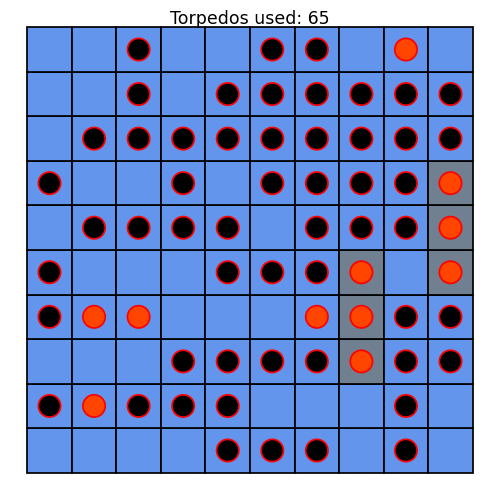

In [41]:
board = Board(10)

In [42]:
test_gym_env = BattleshipEnvClass()
agent = RLAgent(board, model, test_gym_env)
agent.play_until_completion()

KeyboardInterrupt: 